In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(42)

In [ ]:

df = pd.read_csv('raw_dataset.csv')


def perform_initial_analysis(df):
    print("Dataset Shape:", df.shape)
    print("\nDataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nBasic Statistics:")
    print(df.describe())
    
    
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("\nCategorical Columns Summary:")
    for col in categorical_cols:
        print(f"\n{col} value counts:")
        print(df[col].value_counts())

perform_initial_analysis(df)

Dataset Shape: (10000, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage

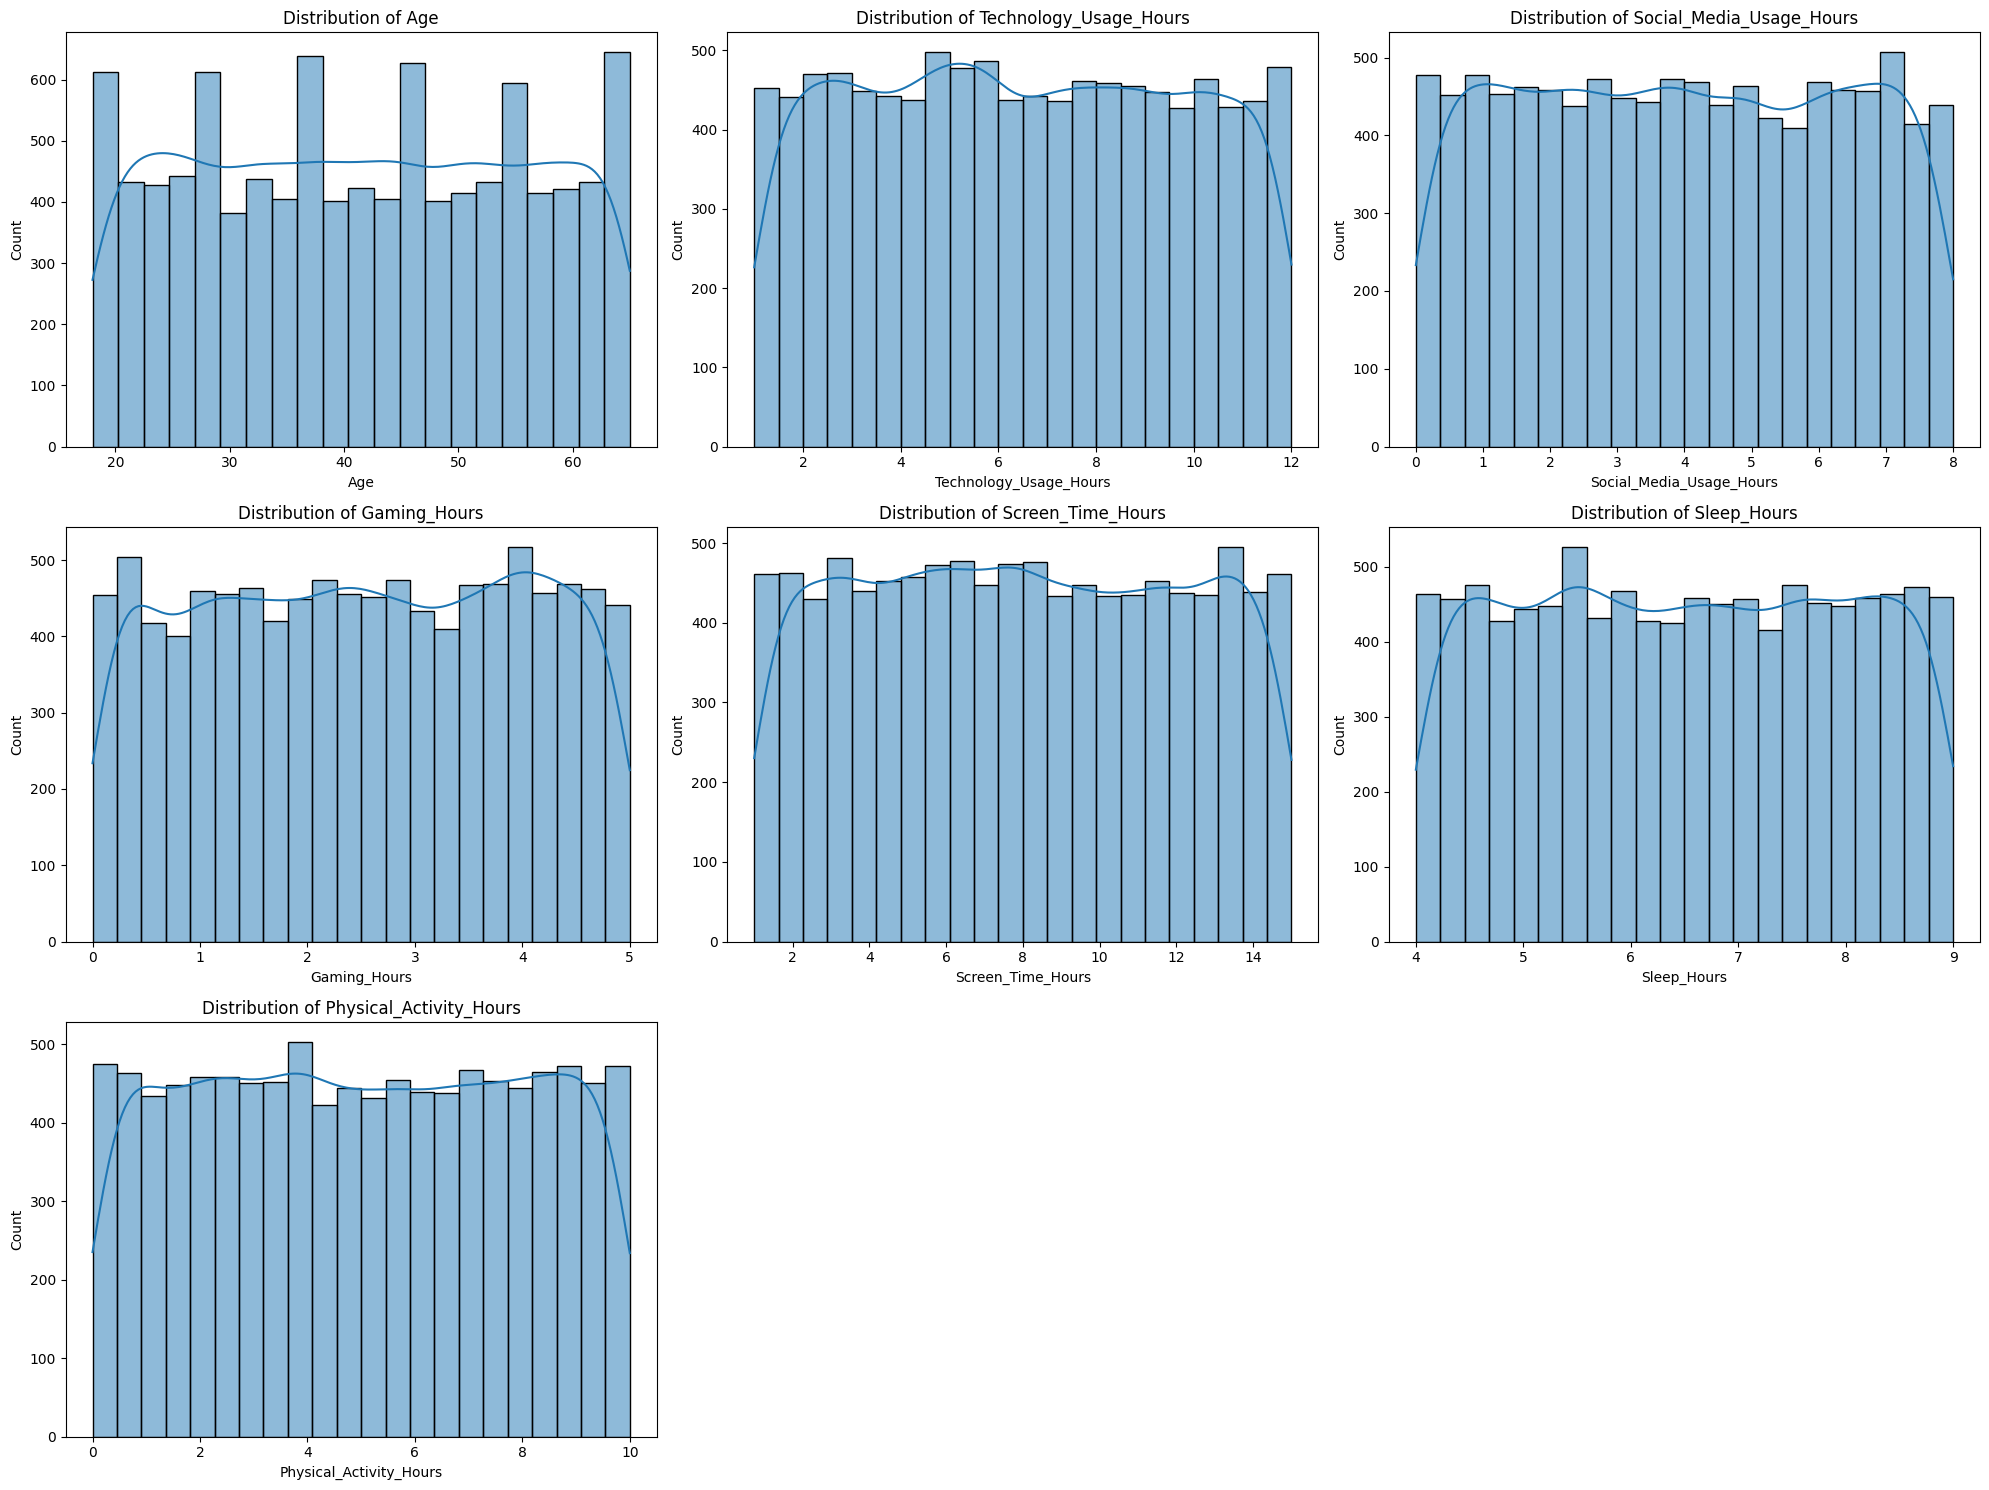

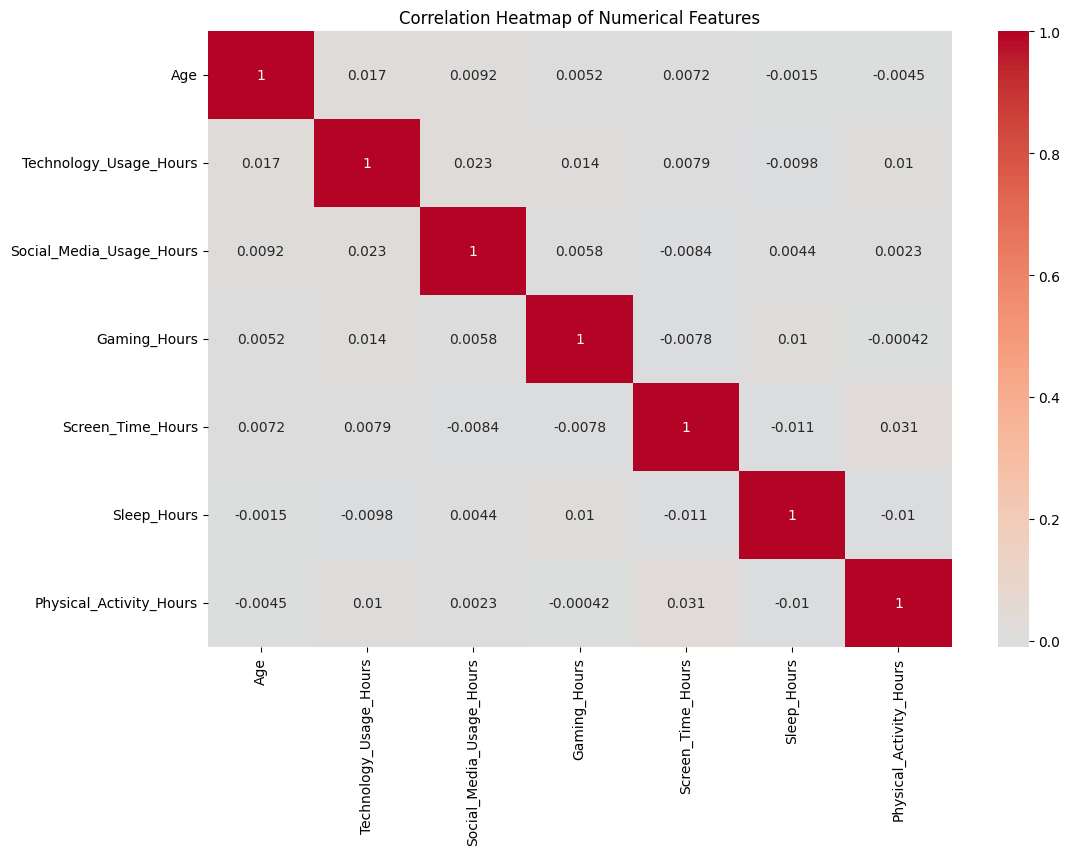

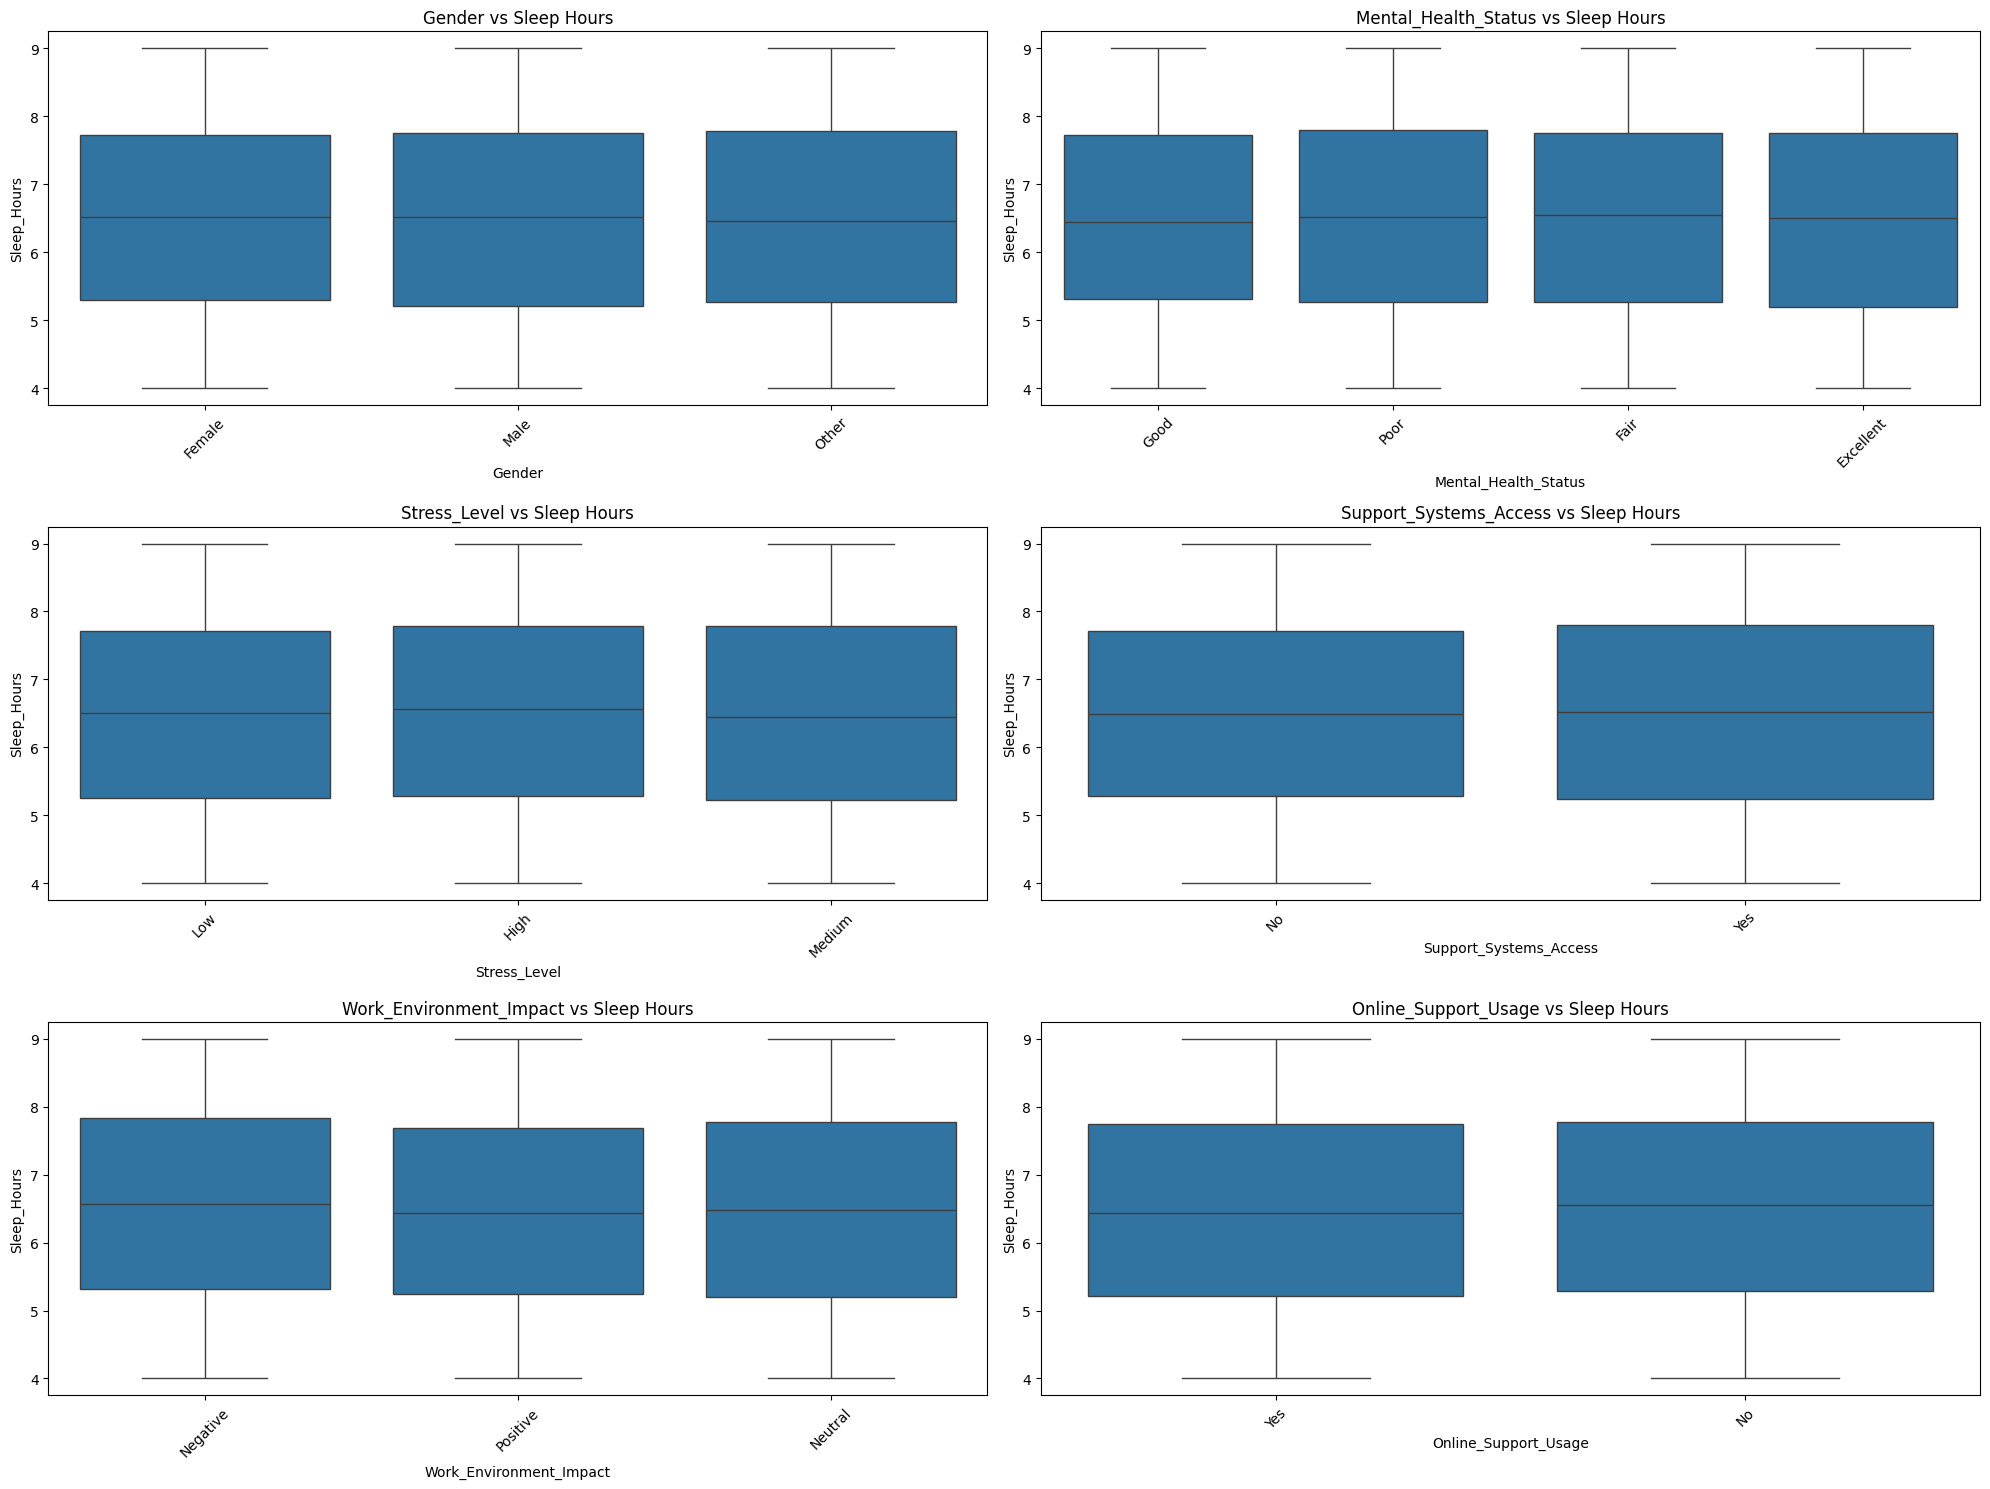


Sleep Hours Analysis:
Average Sleep Hours: 6.500723999999999
Median Sleep Hours: 6.5
Sleep Hours Standard Deviation: 1.450933133028415

Sleep Duration Categories Distribution:
Sleep_Category
Poor (<6h)     4061
Long (>8h)     2017
Good (7-8h)    1986
Fair (6-7h)    1936
Name: count, dtype: int64

Average Sleep Hours by Mental Health Status:
Mental_Health_Status
Excellent    6.480175
Fair         6.509289
Good         6.497145
Poor         6.516582
Name: Sleep_Hours, dtype: float64

Average Sleep Hours by Stress Level:
Stress_Level
High      6.525204
Low       6.484361
Medium    6.492636
Name: Sleep_Hours, dtype: float64

Technology Usage Patterns:

Average Sleep Hours by Technology Usage Category:
Tech_Usage_Category
Low          6.508584
Medium       6.496528
High         6.479172
Very High    6.518598
Name: Sleep_Hours, dtype: float64

Correlation between Total Technology Time and Sleep Hours: -0.001


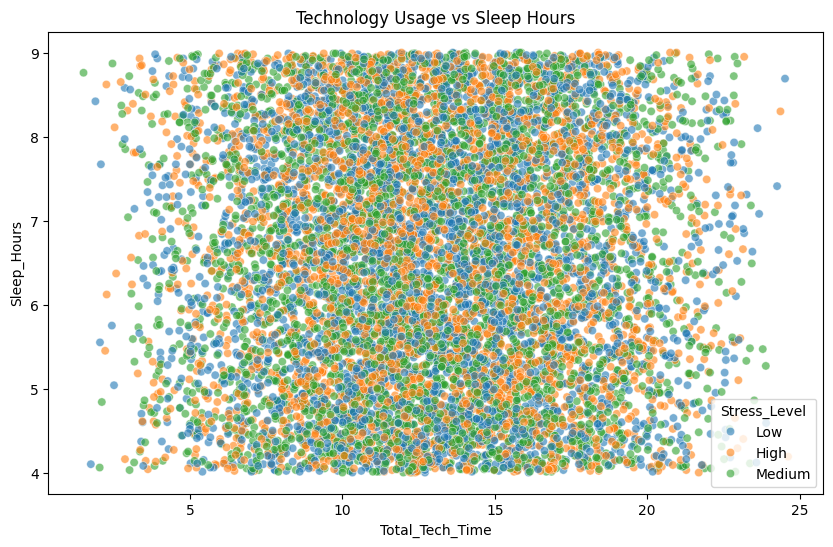

In [ ]:
#EDA
def create_eda_visualizations(df):
    
    
    numerical_features = ['Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 
                         'Gaming_Hours', 'Screen_Time_Hours', 'Sleep_Hours', 
                         'Physical_Activity_Hours']
    
    fig = plt.figure(figsize=(20, 15))
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(3, 3, i)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()
    

    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numerical_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()
    
    
    categorical_features = ['Gender', 'Mental_Health_Status', 'Stress_Level', 
                          'Support_Systems_Access', 'Work_Environment_Impact', 
                          'Online_Support_Usage']
    
    fig = plt.figure(figsize=(20, 15))
    for i, feature in enumerate(categorical_features, 1):
        plt.subplot(3, 2, i)
        sns.boxplot(x=feature, y='Sleep_Hours', data=df)
        plt.xticks(rotation=45)
        plt.title(f'{feature} vs Sleep Hours')
    plt.tight_layout()
    plt.show()


def analyze_sleep_patterns(df):
    print("\nSleep Hours Analysis:")
    print("Average Sleep Hours:", df['Sleep_Hours'].mean())
    print("Median Sleep Hours:", df['Sleep_Hours'].median())
    print("Sleep Hours Standard Deviation:", df['Sleep_Hours'].std())
    
    
    df['Sleep_Category'] = pd.cut(df['Sleep_Hours'], 
                                bins=[0, 6, 7, 8, 24],
                                labels=['Poor (<6h)', 'Fair (6-7h)', 
                                       'Good (7-8h)', 'Long (>8h)'])
    
    print("\nSleep Duration Categories Distribution:")
    print(df['Sleep_Category'].value_counts())
    
    
    print("\nAverage Sleep Hours by Mental Health Status:")
    print(df.groupby('Mental_Health_Status')['Sleep_Hours'].mean())
    
    print("\nAverage Sleep Hours by Stress Level:")
    print(df.groupby('Stress_Level')['Sleep_Hours'].mean())


create_eda_visualizations(df)
analyze_sleep_patterns(df)


def analyze_technology_patterns(df):
    print("\nTechnology Usage Patterns:")
    
    
    df['Total_Tech_Time'] = (df['Technology_Usage_Hours'] + 
                            df['Social_Media_Usage_Hours'] + 
                            df['Gaming_Hours'])
    
    
    df['Tech_Usage_Category'] = pd.qcut(df['Total_Tech_Time'], q=4, 
                                      labels=['Low', 'Medium', 'High', 'Very High'])
    
    print("\nAverage Sleep Hours by Technology Usage Category:")
    print(df.groupby('Tech_Usage_Category')['Sleep_Hours'].mean())
    
    
    tech_sleep_corr = df[['Total_Tech_Time', 'Sleep_Hours']].corr().iloc[0,1]
    print(f"\nCorrelation between Total Technology Time and Sleep Hours: {tech_sleep_corr:.3f}")
    
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Total_Tech_Time', y='Sleep_Hours', 
                    hue='Stress_Level', alpha=0.6)
    plt.title('Technology Usage vs Sleep Hours')
    plt.show()

analyze_technology_patterns(df)

In [ ]:
print("Sleep Hours Statistics:")
print(df['Sleep_Hours'].describe())


z_scores = np.abs(stats.zscore(df['Sleep_Hours']))
outliers = len(z_scores[z_scores > 3])
print(f"\nNumber of outliers (z-score > 3): {outliers}")

Sleep Hours Statistics:
count    10000.000000
mean         6.500724
std          1.450933
min          4.000000
25%          5.260000
50%          6.500000
75%          7.760000
max          9.000000
Name: Sleep_Hours, dtype: float64

Number of outliers (z-score > 3): 0


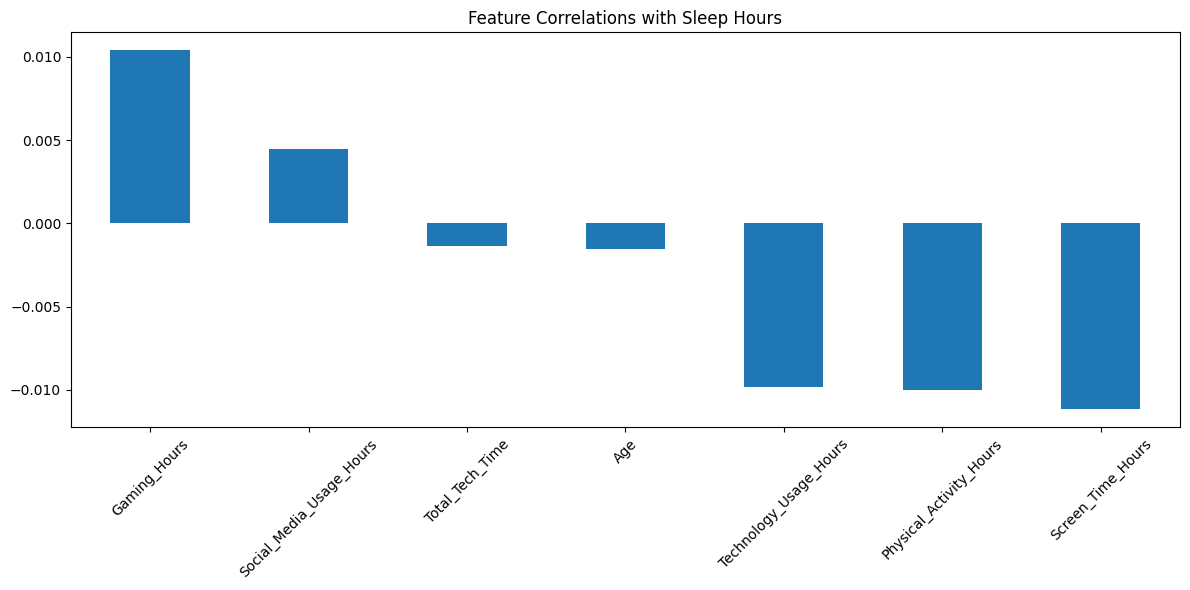


Top correlations with Sleep Hours:
Gaming_Hours                0.010393
Social_Media_Usage_Hours    0.004443
Total_Tech_Time            -0.001356
Age                        -0.001513
Technology_Usage_Hours     -0.009804
Physical_Activity_Hours    -0.009996
Screen_Time_Hours          -0.011181
Name: Sleep_Hours, dtype: float64


In [ ]:
def plot_feature_correlations(df, target='Sleep_Hours'):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    correlations = df[numeric_cols].corr()[target].sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    correlations.drop(target).plot(kind='bar')
    plt.title('Feature Correlations with Sleep Hours')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\nTop correlations with Sleep Hours:")
    print(correlations.drop(target))

plot_feature_correlations(df)

In [ ]:
def prepare_features(df):
    """
    Create separate feature sets for social and technology data with enhanced feature engineering.
    """
    
    X_social = pd.DataFrame()
    
  
    X_social['Mental_Health'] = df['Mental_Health_Status'].map(
    {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3})
    X_social['Stress'] = df['Stress_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
    X_social['Support'] = df['Support_Systems_Access'].map({'No': 0, 'Yes': 1})
    X_social['Work_Impact'] = df['Work_Environment_Impact'].map(
    {'Negative': 0, 'Neutral': 1, 'Positive': 2})
    X_social['Physical_Activity_Hours'] = df['Physical_Activity_Hours']
    X_social['Mental_Health_Risk_Score'] = X_social['Mental_Health'] - X_social['Stress']

    
    
    
    X_social['Stress_Mental_Health_Interaction'] = X_social['Stress'] * X_social['Mental_Health']
    
    
    X_tech = pd.DataFrame()
    tech_features = ['Technology_Usage_Hours', 'Social_Media_Usage_Hours', 
                     'Gaming_Hours', 'Screen_Time_Hours']
    X_tech[tech_features] = df[tech_features]
    
    
   
    X_tech['Gaming_Dominance'] = X_tech['Gaming_Hours'] / (X_tech[['Technology_Usage_Hours', 'Social_Media_Usage_Hours', 
                                                               'Gaming_Hours', 'Screen_Time_Hours']].sum(axis=1) + 1e-6)

    
    
    X_tech['Screen_Time_Per_Physical_Activity'] = X_tech['Screen_Time_Hours'] / (X_social['Physical_Activity_Hours'] + 1e-6)
    X_tech['High_Tech_Usage'] = (X_tech['Technology_Usage_Hours'] > 5).astype(int)  # Binary flag for high usage
    
    
    X_combined = pd.concat([X_social, X_tech], axis=1)
    X_combined["Age"] = df['Age']
    X_combined["Gender"] = df["Gender"].map({'Male': 0, 'Female': 1, 'Other': 2})  # Encode gender
    return X_social, X_tech, X_combined



In [ ]:

X_social, X_tech, X_combined = prepare_features(df)


print("Headers of X_social:")
print(X_social.columns)

print("\nHeaders of X_tech:")
print(X_tech.columns)

print("\nHeaders of X_combined:")
print(X_combined.columns)


Headers of X_social:
Index(['Mental_Health', 'Stress', 'Support', 'Work_Impact',
       'Physical_Activity_Hours', 'Mental_Health_Risk_Score',
       'Stress_Mental_Health_Interaction'],
      dtype='object')

Headers of X_tech:
Index(['Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Gaming_Hours',
       'Screen_Time_Hours', 'Gaming_Dominance',
       'Screen_Time_Per_Physical_Activity', 'High_Tech_Usage'],
      dtype='object')

Headers of X_combined:
Index(['Mental_Health', 'Stress', 'Support', 'Work_Impact',
       'Physical_Activity_Hours', 'Mental_Health_Risk_Score',
       'Stress_Mental_Health_Interaction', 'Technology_Usage_Hours',
       'Social_Media_Usage_Hours', 'Gaming_Hours', 'Screen_Time_Hours',
       'Gaming_Dominance', 'Screen_Time_Per_Physical_Activity',
       'High_Tech_Usage', 'Age', 'Gender'],
      dtype='object')


In [ ]:
def train_evaluate_model(X, y, model_type='rf'):
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    
    if model_type == 'rf':
        model = RandomForestRegressor(random_state=42)
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5],
            'max_features': ['sqrt']
        }
    elif model_type == 'xgb':
        model = XGBRegressor(random_state=42)
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1.0]
        }
    else:  
        model = MLPRegressor(random_state=42, max_iter=2000)
        param_grid = {
            'hidden_layer_sizes': [(50,), (100,)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001]
        }
    
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        scoring='r2',
        verbose=1
    )
    
    
    grid_search.fit(X_train_scaled, y_train)
    
    
    best_model = grid_search.best_estimator_
    
    
    y_pred = best_model.predict(X_test_scaled)
    
    
    metrics = {
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mae': mean_absolute_error(y_test, y_pred),
        'cv_scores': cross_val_score(best_model, X_train_scaled, y_train, 
                                   cv=5, scoring='neg_mean_squared_error')
    }
    
    
    metrics['cv_scores'] = -metrics['cv_scores']
    
    print(f"\n{model_type.upper()} Results:")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation MSE: {-grid_search.best_score_:.3f}")
    print(f"Test MSE: {metrics['mse']:.3f}")
    print(f"Test RMSE: {metrics['rmse']:.3f}")
    print(f"Test MAE: {metrics['mae']:.3f}")
    
    
    feature_imp = None
    if hasattr(best_model, 'feature_importances_'):
        feature_imp = pd.DataFrame({
            'feature': X.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)
        print("\nTop 5 Feature Importances:")
        print(feature_imp.head())
    
    results = {
        'model': best_model,
        'best_params': grid_search.best_params_,
        'predictions': y_pred,
        'actual': y_test,
        'metrics': metrics,
        'feature_importances': feature_imp
    }
    
    return results

def run_analysis(df):
    

    X_social, X_tech, X_combined = prepare_features(df)
    y = df['Sleep_Hours']
    
    all_results = {}
    feature_sets = {
        'social_features': X_social,
        'technology_features': X_tech,
        'combined_features': X_combined
    }
    
    models = ['rf', 'xgb', 'mlp']
    
    for feature_set_name, X in feature_sets.items():
        print(f"\nAnalyzing {feature_set_name}...")
        all_results[feature_set_name] = {}
        
        for model_type in models:
            print(f"\nTraining {model_type} model...")
            results = train_evaluate_model(X, y, model_type)
            all_results[feature_set_name][model_type] = results
    
    return all_results


results = run_analysis(df)


Analyzing social_features...

Training rf model...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

RF Results:
Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation MSE: 0.004
Test MSE: 2.115
Test RMSE: 1.454
Test MAE: 1.261

Top 5 Feature Importances:
                            feature  importance
4           Physical_Activity_Hours    0.582090
3                       Work_Impact    0.111795
5          Mental_Health_Risk_Score    0.088026
6  Stress_Mental_Health_Interaction    0.057286
0                     Mental_Health    0.056366

Training xgb model...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

XGB Results:
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validation MSE: 0.011
Test MSE: 2.135
Test RMSE: 1.461
Test MAE: 1.264

Top 5 Feature Importances:
                            feature  importance
4           Physical_A

In [ ]:
def perform_model_statistical_comparison(all_results):
    model_combinations = []
    for feature_set in ['social_features', 'technology_features', 'combined_features']:
        for model_type in ['rf', 'xgb', 'mlp']:
            model_combinations.append(f"{feature_set}-{model_type}")
    n = len(model_combinations)
    comparison_matrix = pd.DataFrame(
        index=model_combinations,
        columns=model_combinations,
        data='N/A'
    )
    key_models = ['rf', 'xgb', 'mlp']
    feature_sets = ['social_features', 'technology_features', 'combined_features']
    p_values = pd.DataFrame(
        index=['RF vs. XGB', 'RF vs. MLP', 'XGB vs. MLP'],
        columns=['Social', 'Technology', 'Combined'],
        data=float('nan')
    )
    
    alpha = 0.05
    
    for i, model1 in enumerate(model_combinations):
        feature_set1, model_type1 = model1.split('-')
        residuals1 = (all_results[feature_set1][model_type1]['actual'] - 
                     all_results[feature_set1][model_type1]['predictions'])
        
        for j, model2 in enumerate(model_combinations):
            feature_set2, model_type2 = model2.split('-')
            residuals2 = (all_results[feature_set2][model_type2]['actual'] - 
                         all_results[feature_set2][model_type2]['predictions'])

            if i == j:
                comparison_matrix.iloc[i, j] = '-'
                continue
            t_stat, p_value = stats.ttest_rel(residuals1, residuals2)
            comparison_matrix.iloc[i, j] = 'Y' if p_value < alpha else 'N'

            if feature_set1 == feature_set2:
                if (model_type1 == 'rf' and model_type2 == 'xgb'):
                    col = feature_set1.split('_')[0].capitalize()
                    p_values.loc['RF vs. XGB', col] = p_value
                elif (model_type1 == 'rf' and model_type2 == 'mlp'):
                    col = feature_set1.split('_')[0].capitalize()
                    p_values.loc['RF vs. MLP', col] = p_value
                elif (model_type1 == 'xgb' and model_type2 == 'mlp'):
                    col = feature_set1.split('_')[0].capitalize()
                    p_values.loc['XGB vs. MLP', col] = p_value
    
    return comparison_matrix, p_values

def display_comparison_results(all_results, comparison_matrix, p_values):  # Added comparison_matrix and p_values as parameters
    model_metrics = []
    for feature_set in ['social_features', 'technology_features', 'combined_features']:
        for model_type in ['rf', 'xgb', 'mlp']:
            metrics = all_results[feature_set][model_type]['metrics']
            model_metrics.append({
                'Model': f"{feature_set}-{model_type}",
                'MSE': metrics['mse'],
                'RMSE': metrics['rmse'],
                'MAE': metrics['mae']
            })
    
    metrics_df = pd.DataFrame(model_metrics)
    
    print("Statistical Significance Comparison Matrix (Y=significant, N=not significant, -=self comparison)")
    print("A 'Y' indicates that the difference between models is statistically significant (p < 0.05)")
    print("\nComparison Matrix:")
    print(comparison_matrix)
    print("\nP-values for Key Model Comparisons:")
    print(p_values.round(4))
    print("\nModel Performance Metrics:")
    print(metrics_df)
    
    return comparison_matrix, p_values, metrics_df

comparison_matrix, p_values = perform_model_statistical_comparison(results)
comparison_matrix, p_values, metrics_df = display_comparison_results(results, comparison_matrix, p_values)

Statistical Significance Comparison Matrix (Y=significant, N=not significant, -=self comparison)
A 'Y' indicates that the difference between models is statistically significant (p < 0.05)

Comparison Matrix:
                        social_features-rf social_features-xgb  \
social_features-rf                       -                   N   
social_features-xgb                      N                   -   
social_features-mlp                      Y                   Y   
technology_features-rf                   Y                   Y   
technology_features-xgb                  N                   N   
technology_features-mlp                  Y                   Y   
combined_features-rf                     Y                   Y   
combined_features-xgb                    N                   N   
combined_features-mlp                    Y                   Y   

                        social_features-mlp technology_features-rf  \
social_features-rf                        Y                  

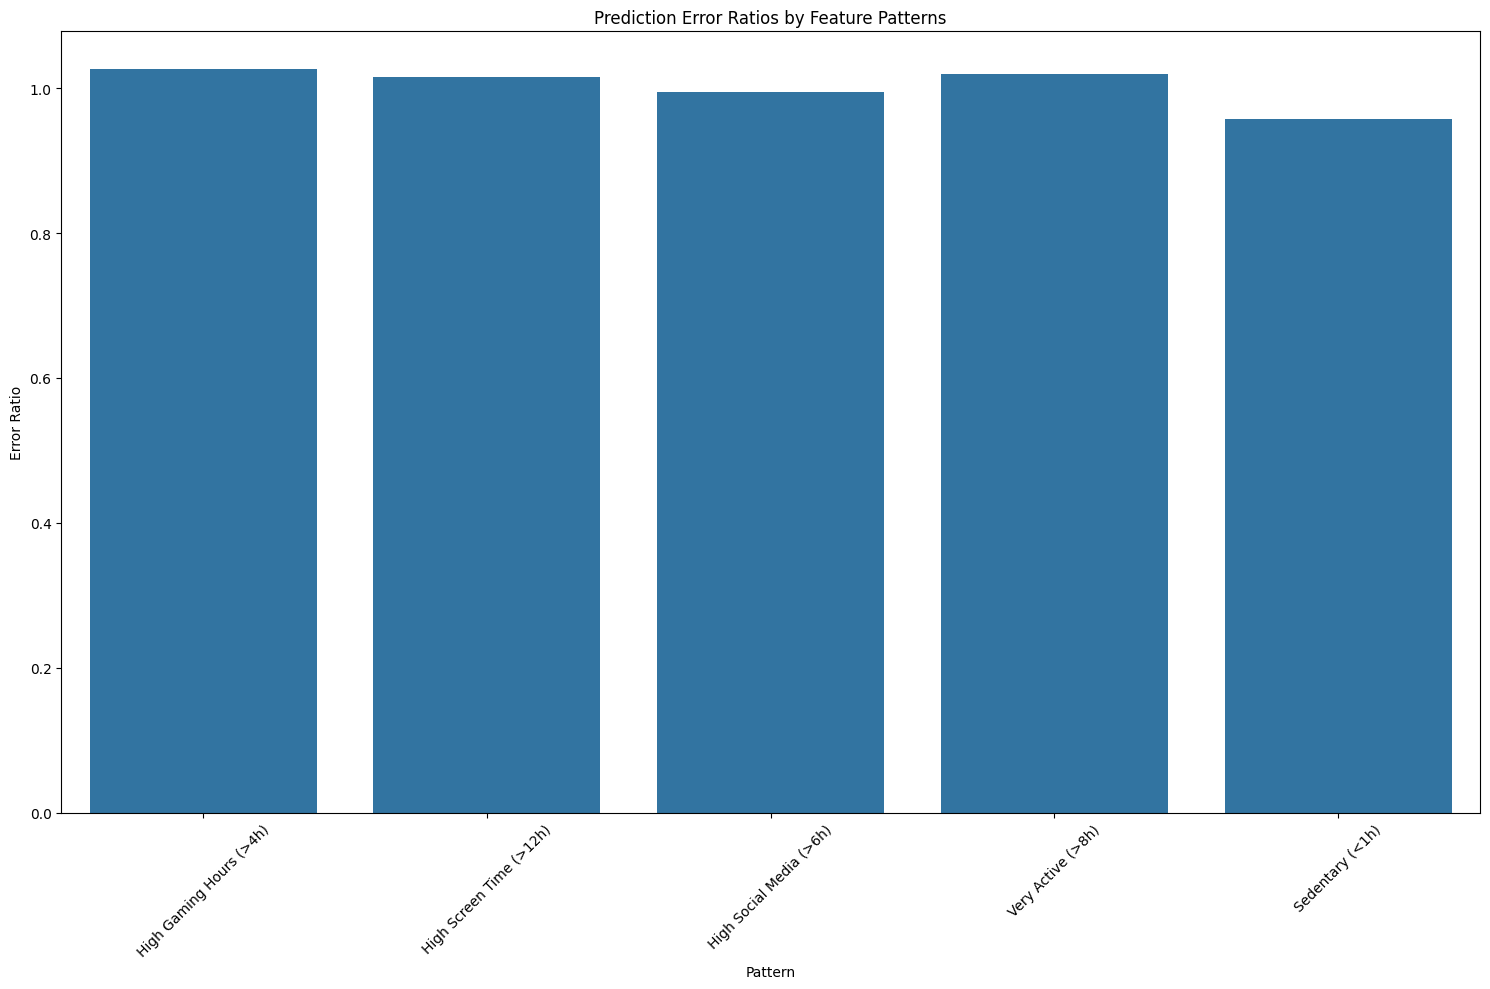

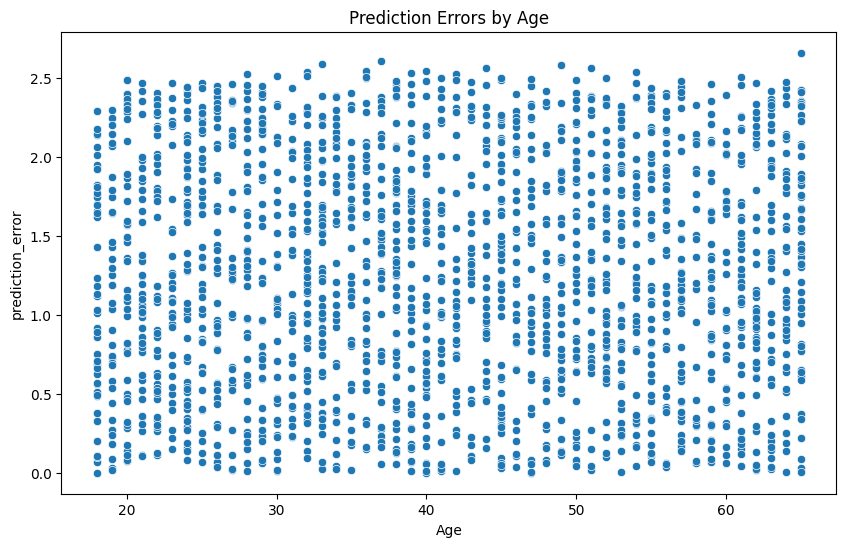

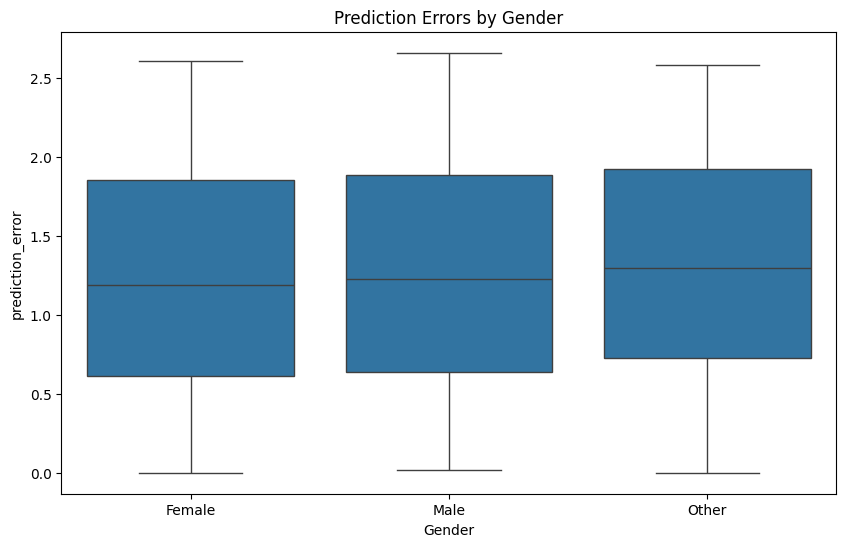


Feature-Specific Error Pattern Analysis:
----------------------------------------

High Gaming Hours (>4h):
Mean Error: 1.289
Error Ratio vs Baseline: 1.03
Sample Size: 2034

High Screen Time (>12h):
Mean Error: 1.277
Error Ratio vs Baseline: 1.02
Sample Size: 2111

High Social Media (>6h):
Mean Error: 1.257
Error Ratio vs Baseline: 0.99
Sample Size: 2484

Very Active (>8h):
Mean Error: 1.282
Error Ratio vs Baseline: 1.02
Sample Size: 2043

Sedentary (<1h):
Mean Error: 1.213
Error Ratio vs Baseline: 0.96
Sample Size: 1040


In [ ]:
def analyze_error_patterns(df, predictions, actual):
    
    errors = np.abs(predictions - actual)
    df_analysis = df.copy()
    df_analysis['prediction_error'] = errors
    
    
    tech_patterns = {
        'High Gaming Hours (>4h)': df_analysis['Gaming_Hours'] > 4,
        'High Screen Time (>12h)': df_analysis['Screen_Time_Hours'] > 12,
        'High Social Media (>6h)': df_analysis['Social_Media_Usage_Hours'] > 6
    }
    
    
    df_analysis['high_stress_poor_mental'] = (
        (df_analysis['Mental_Health_Status'] == 'Poor') & 
        (df_analysis['Stress_Level'] == 'High')
    )
    
    
    physical_patterns = {
        'Very Active (>8h)': df_analysis['Physical_Activity_Hours'] > 8,
        'Sedentary (<1h)': df_analysis['Physical_Activity_Hours'] < 1
    }
    
    
    results = []
    
    
    for pattern_name, mask in tech_patterns.items():
        pattern_errors = df_analysis[mask]['prediction_error']
        baseline_errors = df_analysis[~mask]['prediction_error']
        
        results.append({
            'Pattern': pattern_name,
            'Mean Error': pattern_errors.mean(),
            'Error Ratio': pattern_errors.mean() / baseline_errors.mean(),
            'Sample Size': len(pattern_errors)
        })
    
    
    for pattern_name, mask in physical_patterns.items():
        pattern_errors = df_analysis[mask]['prediction_error']
        baseline_errors = df_analysis[~mask]['prediction_error']
        
        results.append({
            'Pattern': pattern_name,
            'Mean Error': pattern_errors.mean(),
            'Error Ratio': pattern_errors.mean() / baseline_errors.mean(),
            'Sample Size': len(pattern_errors)
        })
    
    
    plt.figure(figsize=(15, 10))
    
    
    results_df = pd.DataFrame(results)
    sns.barplot(x='Pattern', y='Error Ratio', data=results_df)
    plt.xticks(rotation=45)
    plt.title('Prediction Error Ratios by Feature Patterns')
    plt.tight_layout()
    plt.show()
    
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_analysis, x='Age', y='prediction_error')
    plt.title('Prediction Errors by Age')
    plt.show()
    
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_analysis, x='Gender', y='prediction_error')
    plt.title('Prediction Errors by Gender')
    plt.show()
    
    return results_df

def display_error_patterns(results_df):
    print("\nFeature-Specific Error Pattern Analysis:")
    print("----------------------------------------")
    for _, row in results_df.iterrows():
        print(f"\n{row['Pattern']}:")
        print(f"Mean Error: {row['Mean Error']:.3f}")
        print(f"Error Ratio vs Baseline: {row['Error Ratio']:.2f}")
        print(f"Sample Size: {row['Sample Size']}")

best_model = results['combined_features']['rf']
error_results = analyze_error_patterns(
    df,
    best_model['predictions'],
    best_model['actual']
)
display_error_patterns(error_results)

Generating model comparison plots...


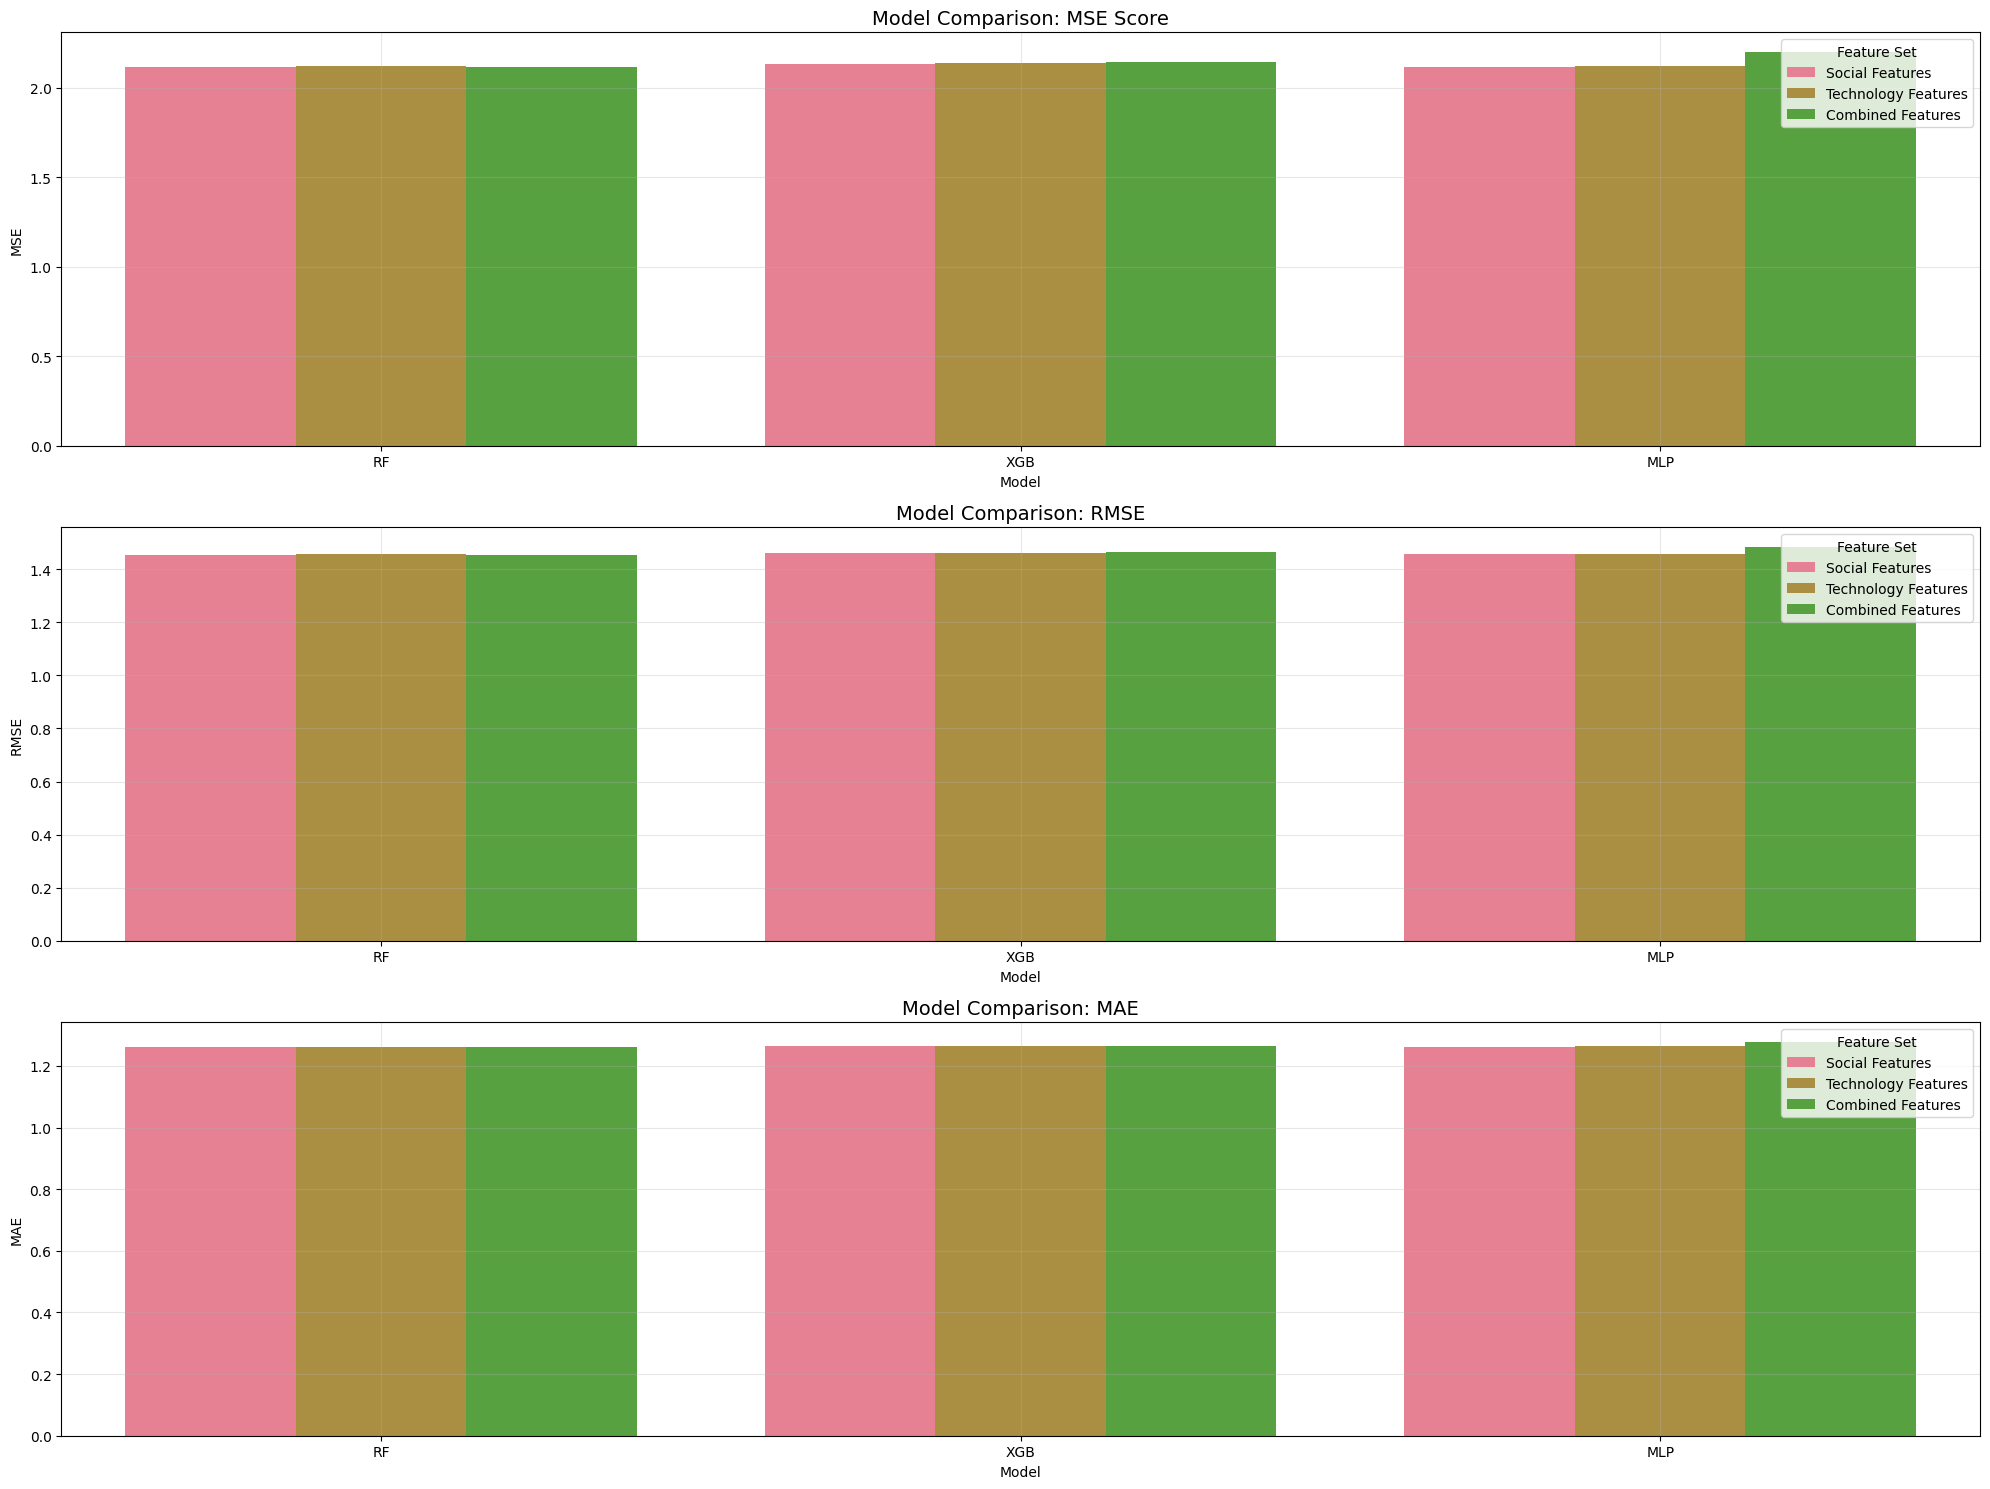


Generating feature importance plots...


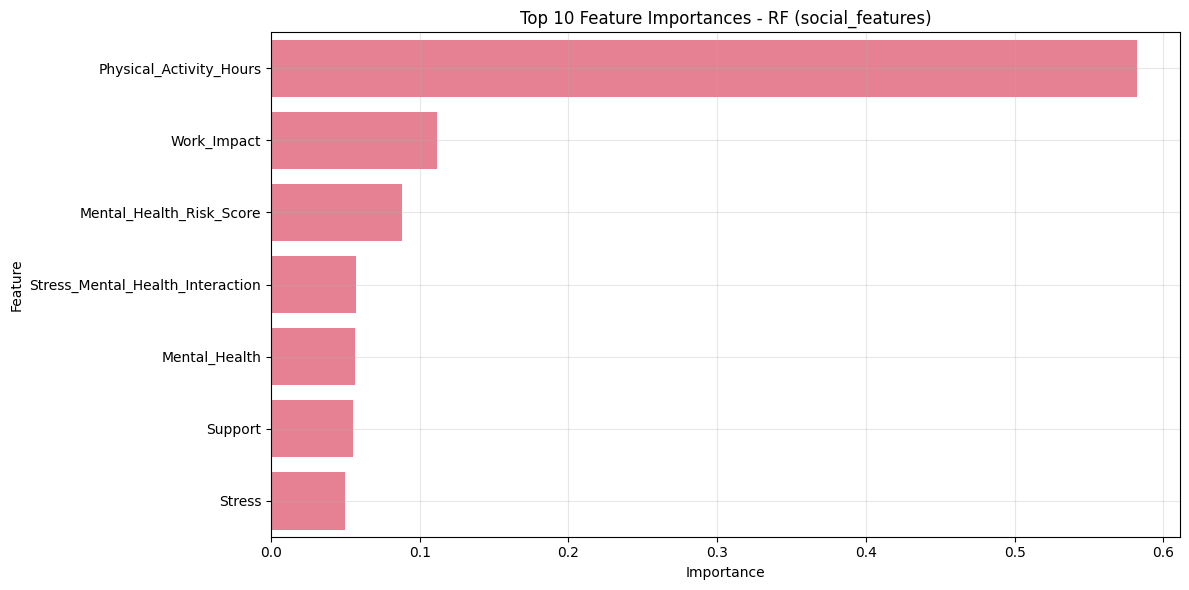

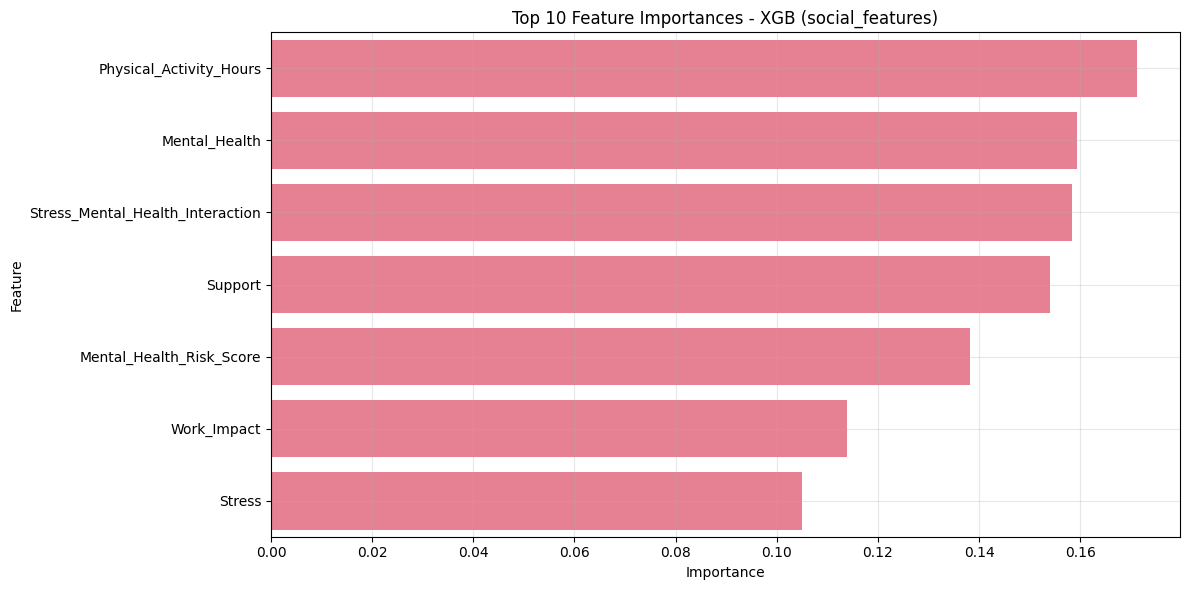

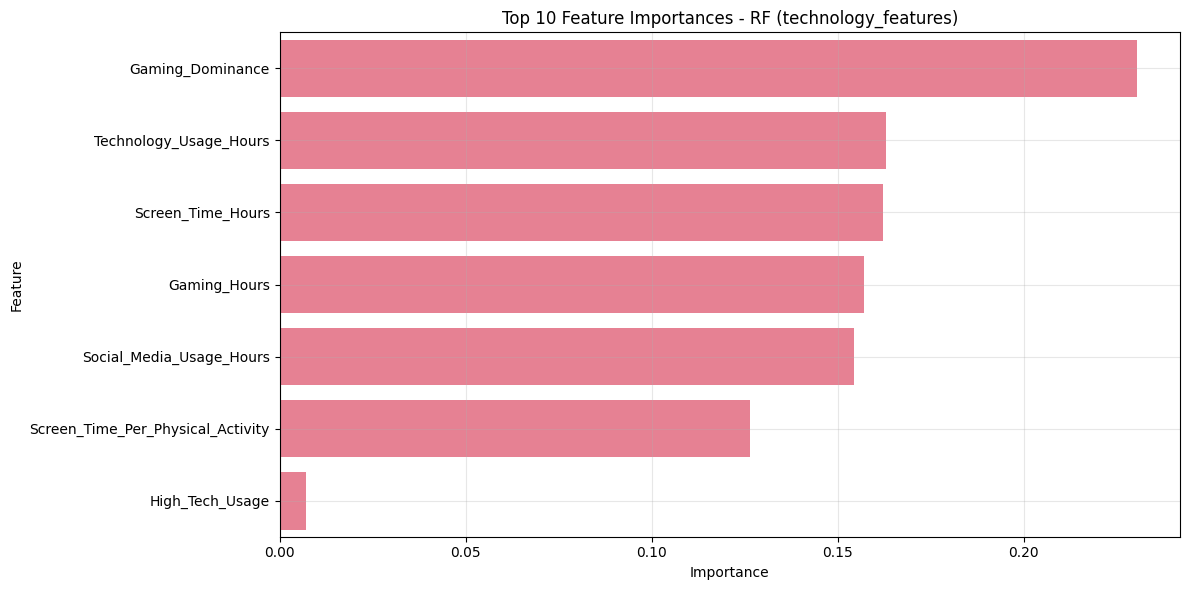

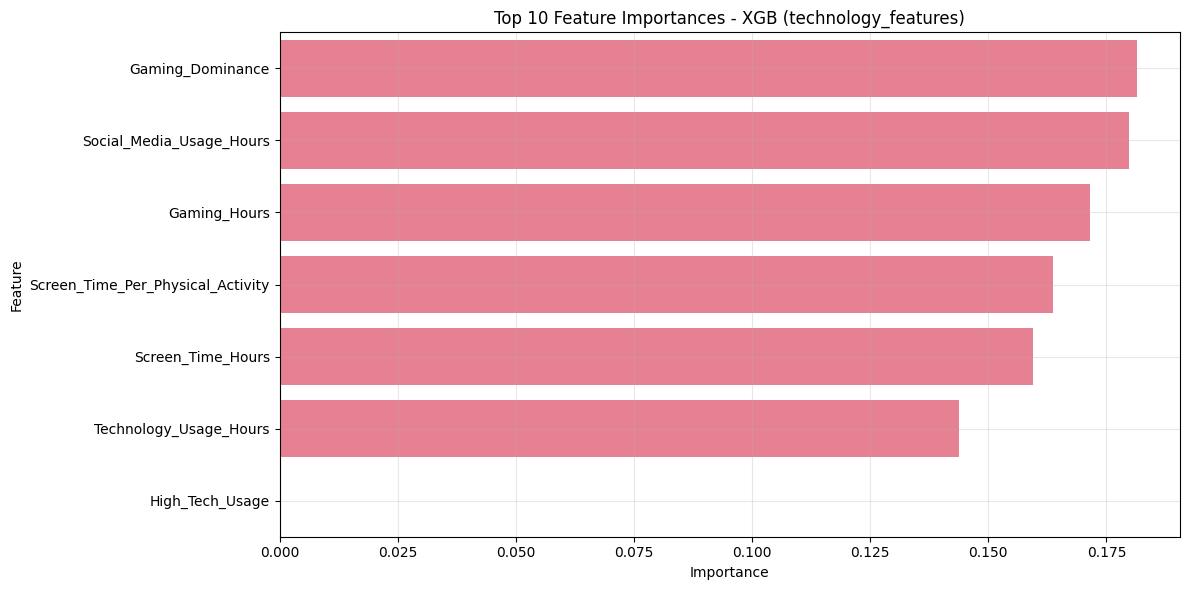

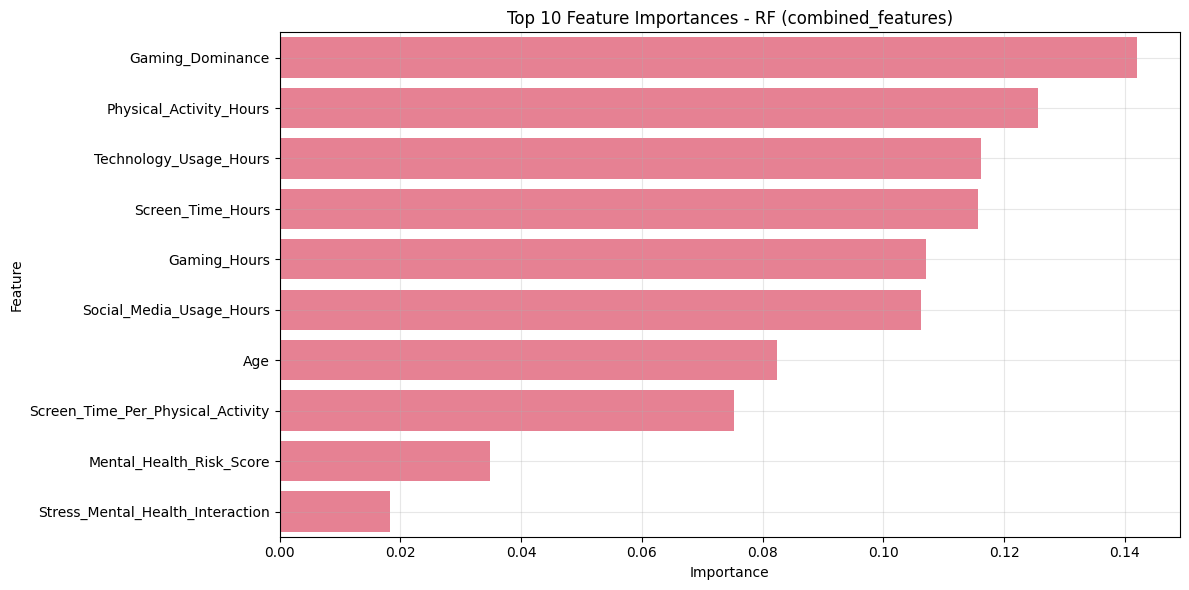

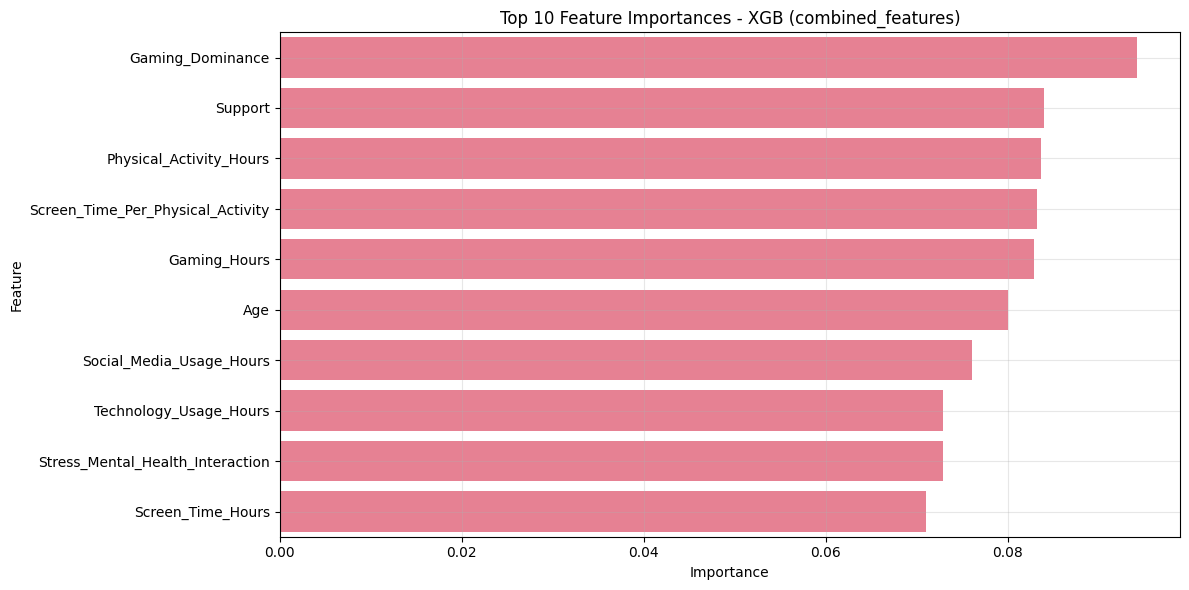


Generating prediction analysis plots...


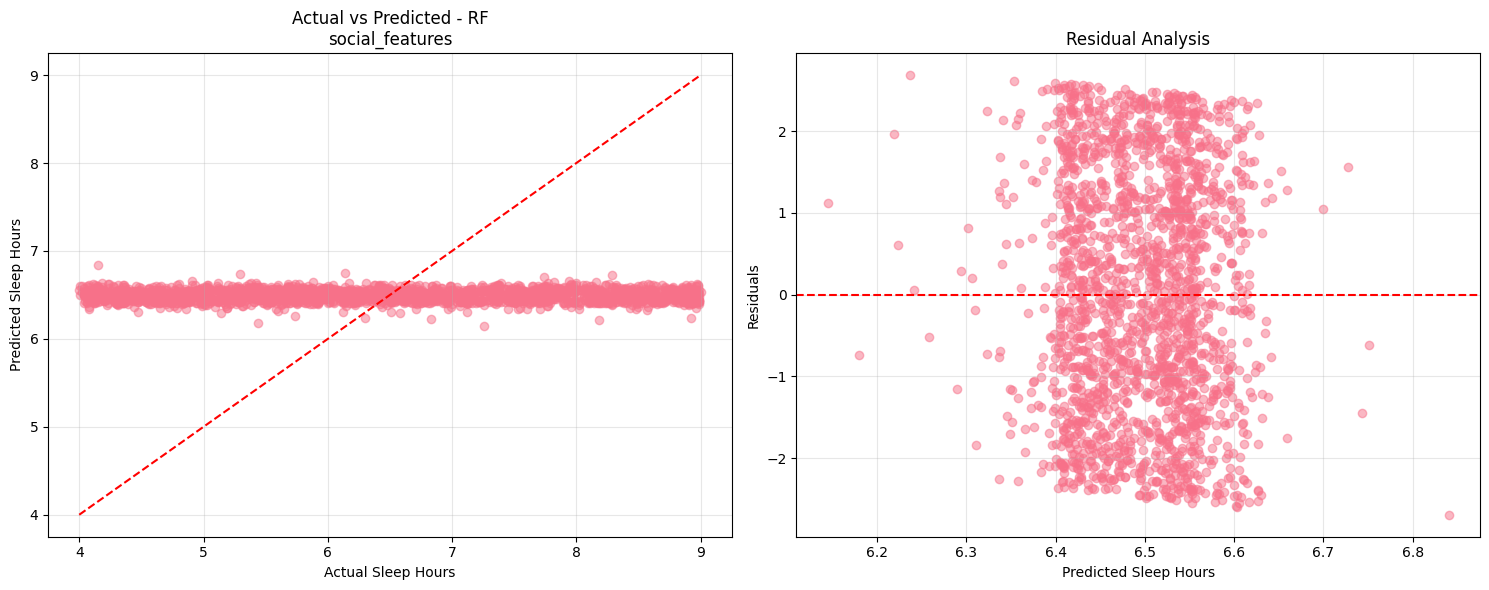

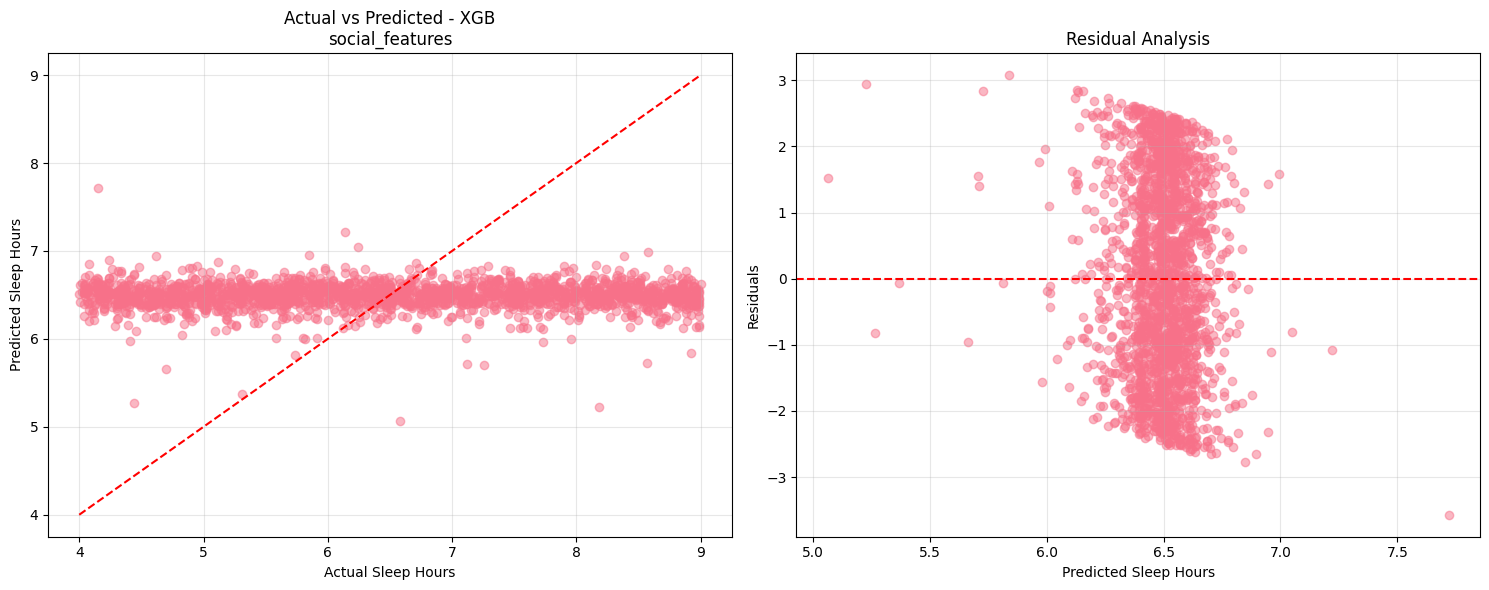

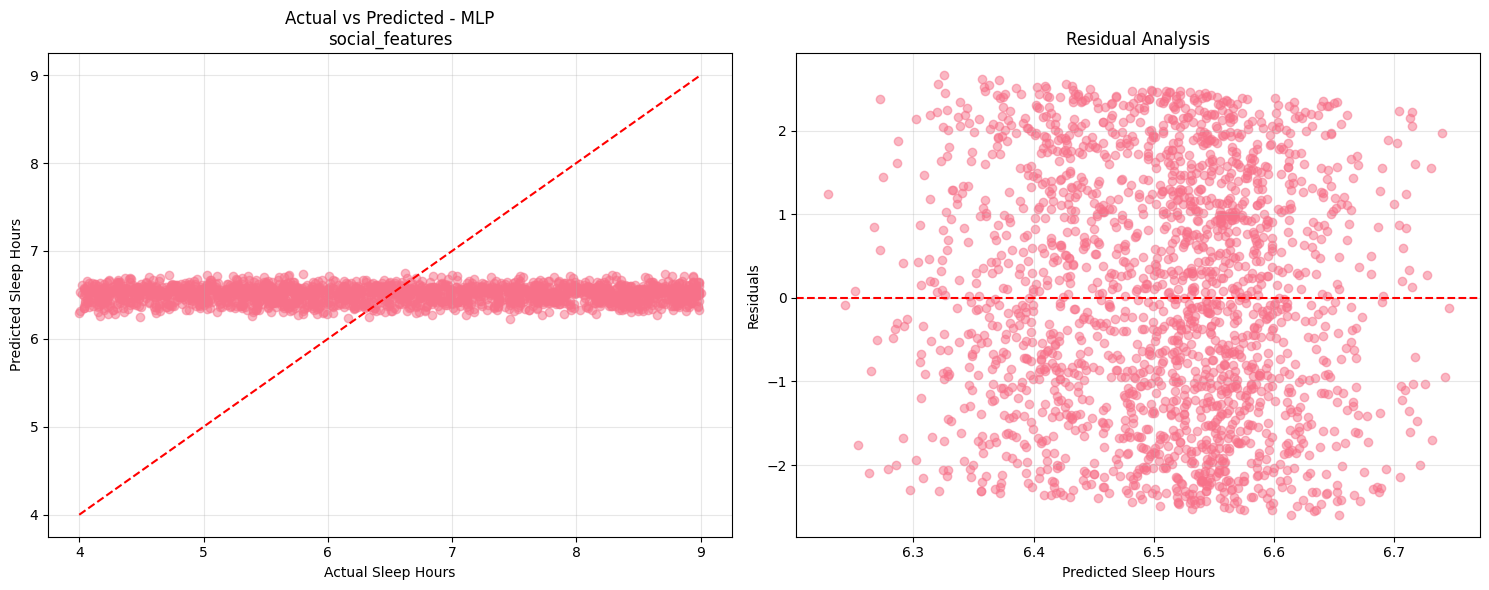

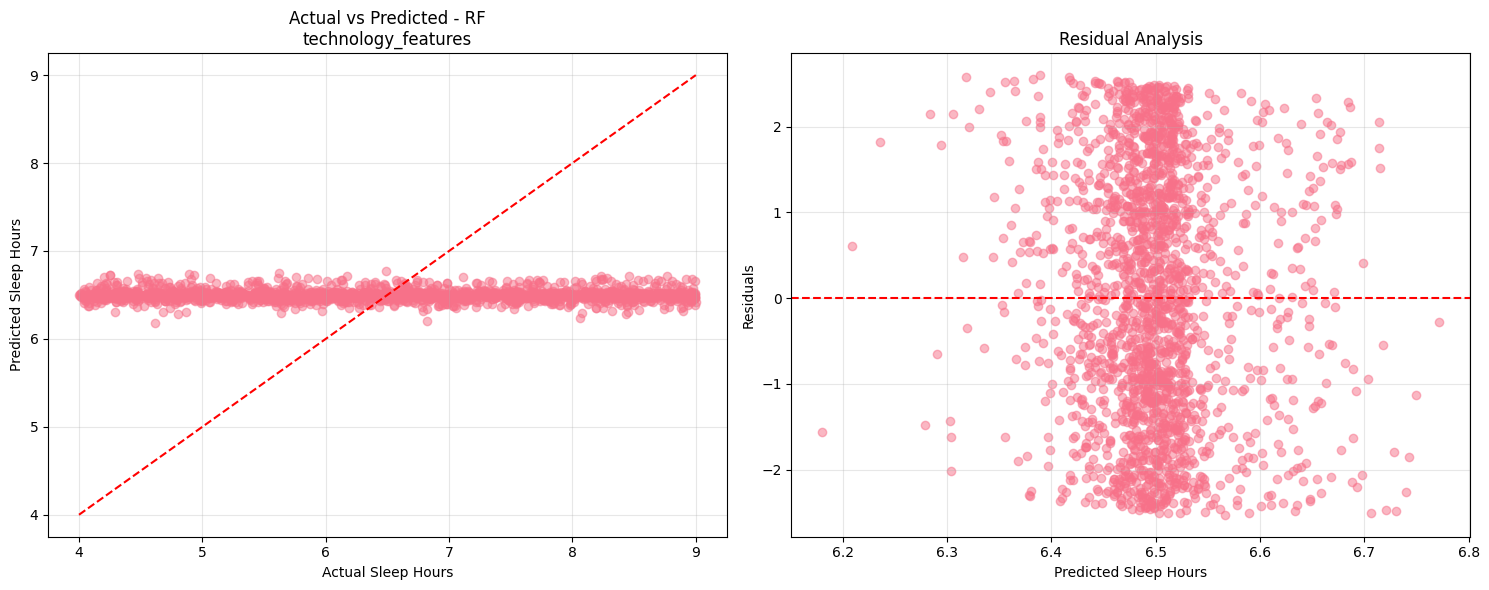

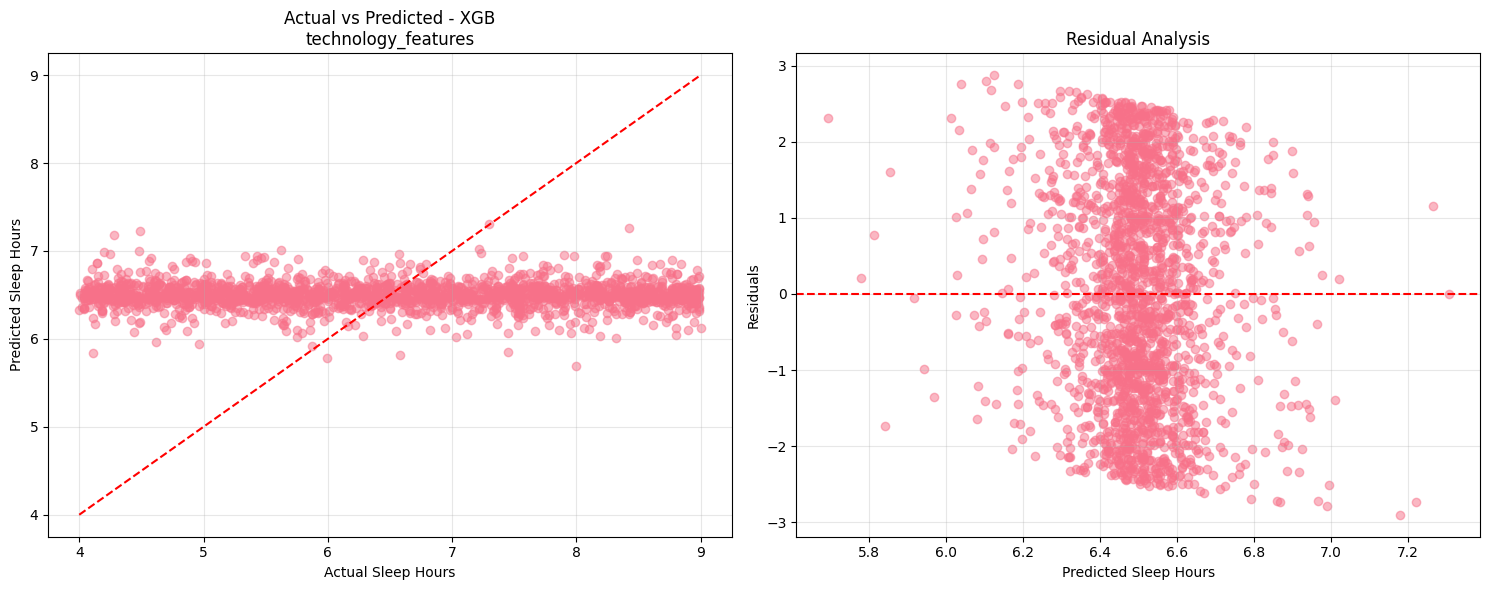

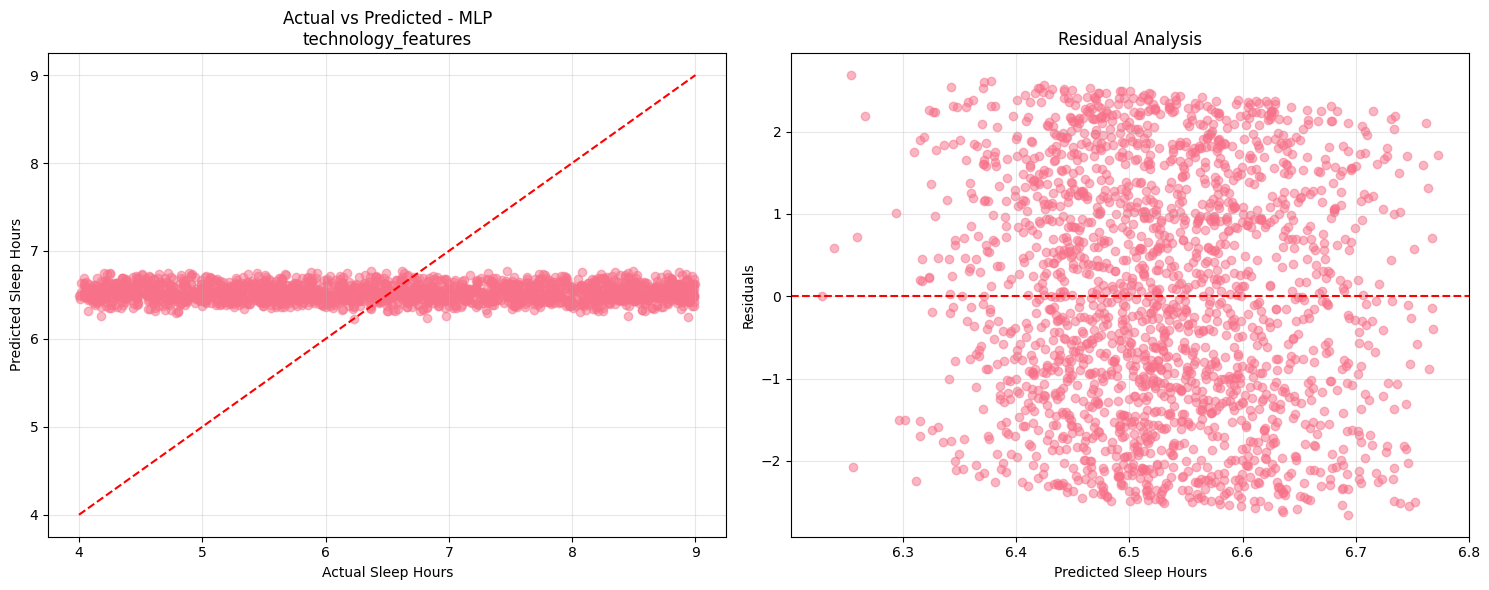

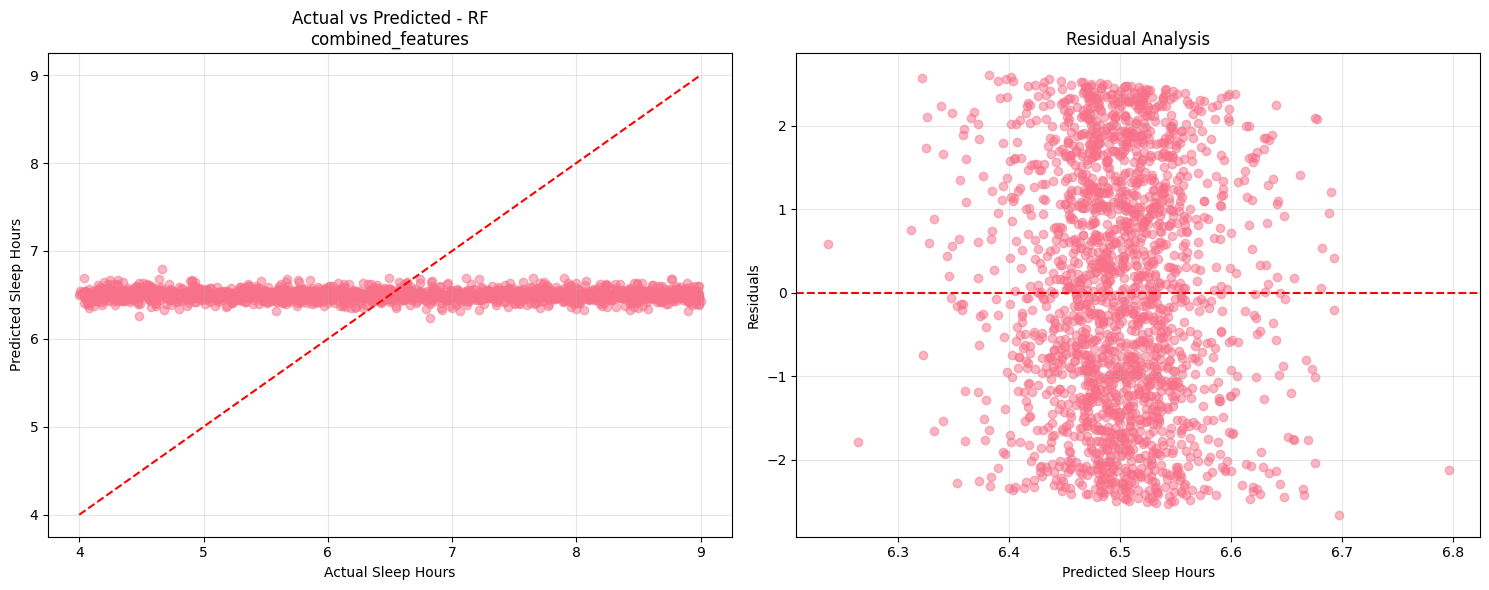

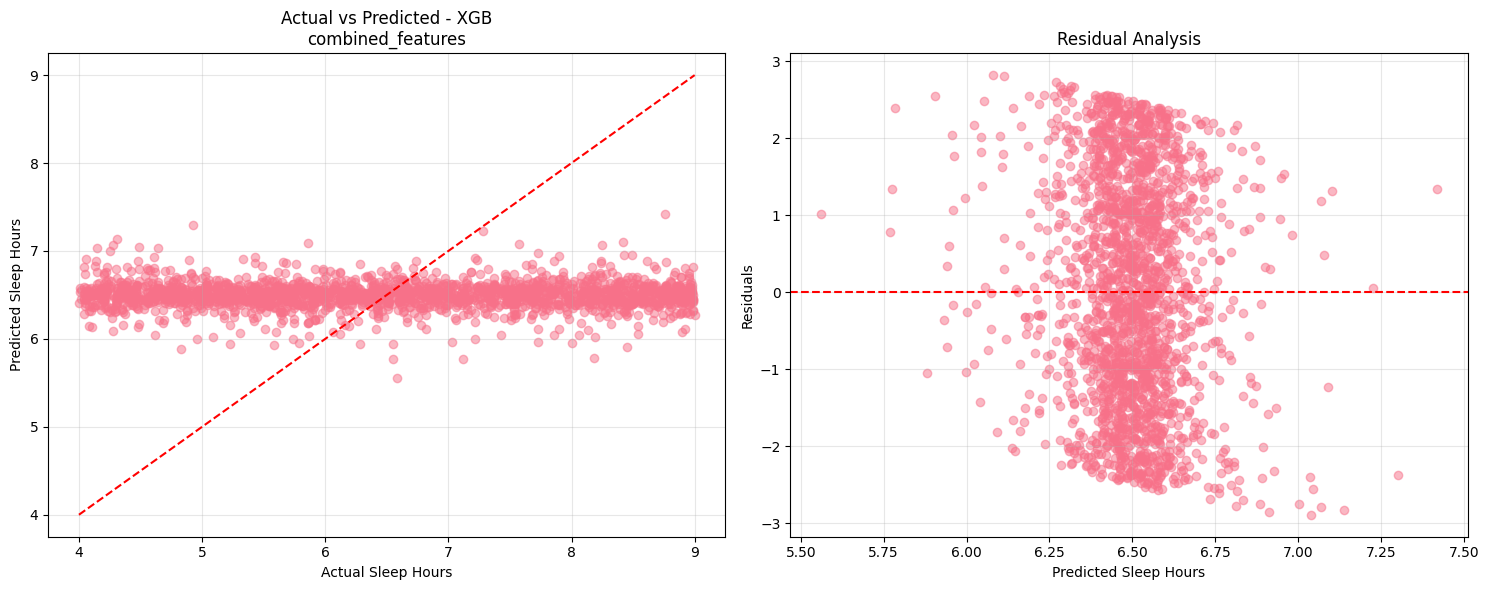

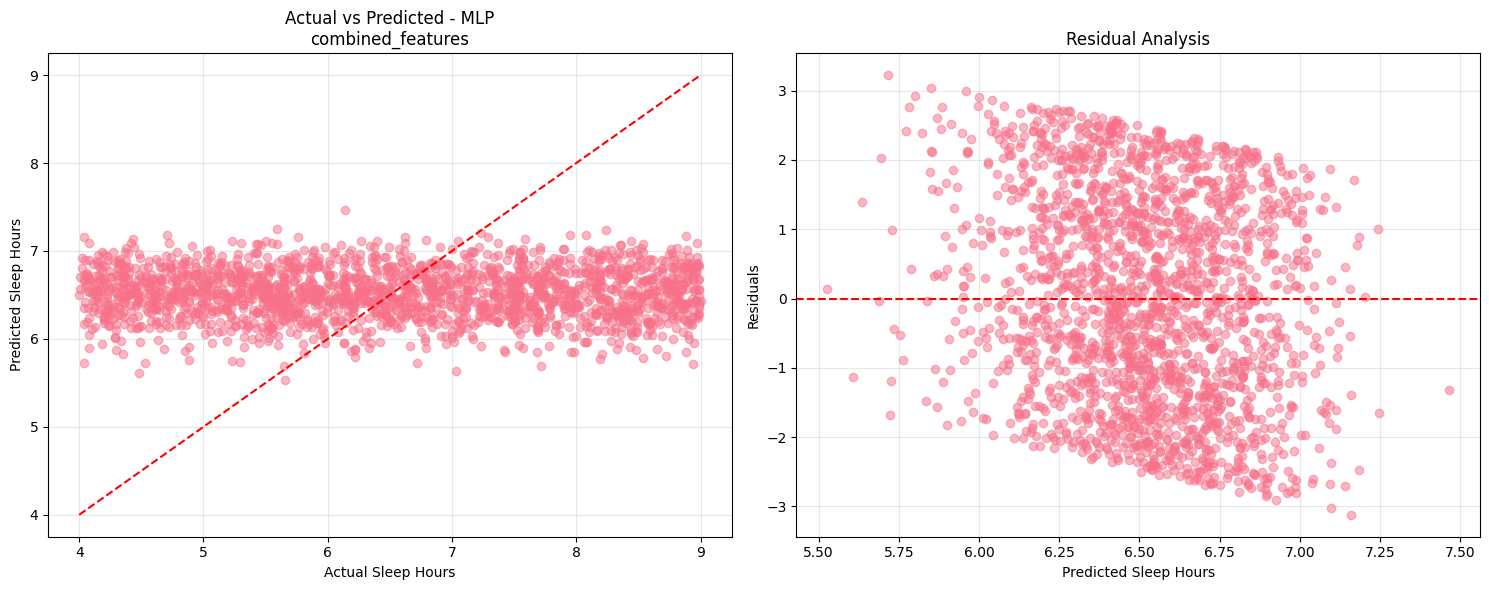


Generating cross-validation results plots...


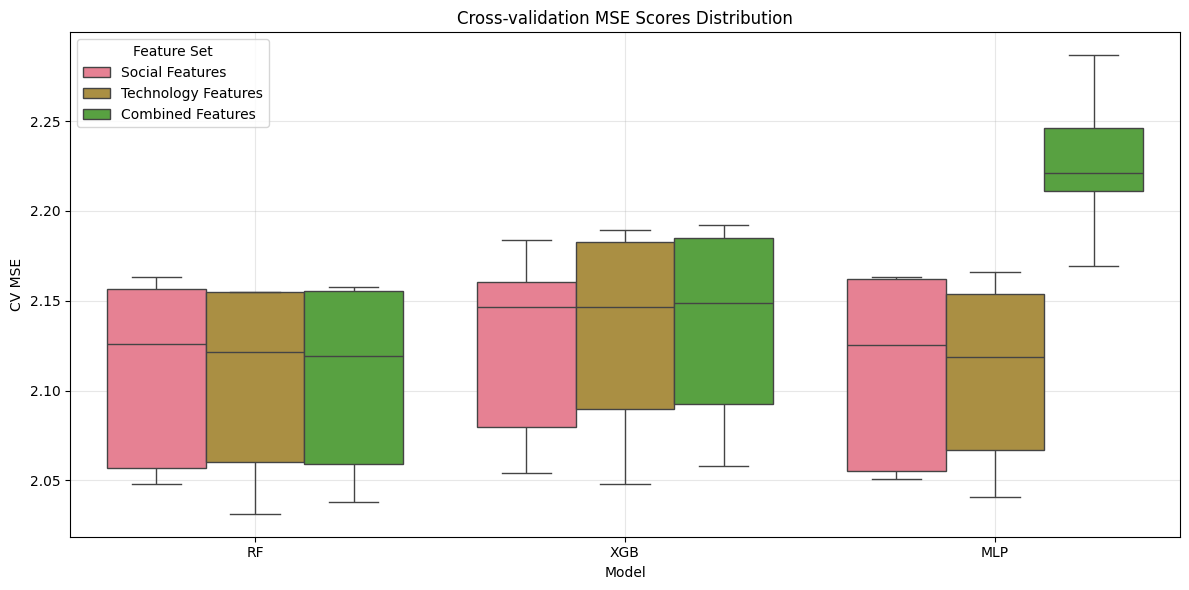


Generating correlation heatmap...


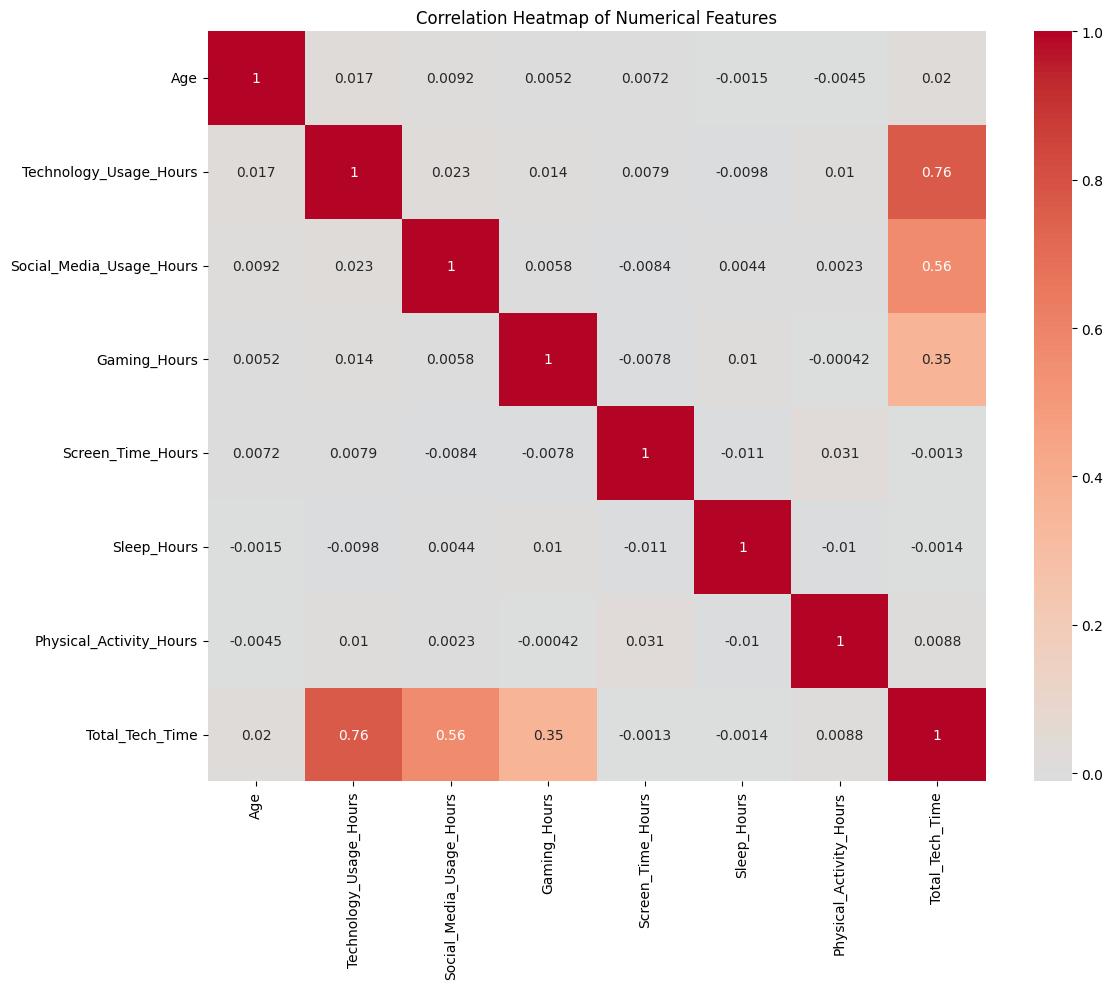

In [ ]:
def plot_model_comparisons(all_results):
    
    plot_data = []
    for feature_set in all_results.keys():
        for model_type, results in all_results[feature_set].items():
            metrics = results['metrics']
            plot_data.append({
                'Feature Set': feature_set.replace('_', ' ').title(),
                'Model': model_type.upper(),
                'MSE': metrics['mse'],
                'RMSE': metrics['rmse'],
                'MAE': metrics['mae']
            })
    
    df_plot = pd.DataFrame(plot_data)
    
    
    fig = plt.figure(figsize=(20, 15))
    
    
    plt.subplot(3, 1, 1)
    sns.barplot(x='Model', y='MSE', hue='Feature Set', data=df_plot)
    plt.title('Model Comparison: MSE Score', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    
    plt.subplot(3, 1, 2)
    sns.barplot(x='Model', y='RMSE', hue='Feature Set', data=df_plot)
    plt.title('Model Comparison: RMSE', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    
    plt.subplot(3, 1, 3)
    sns.barplot(x='Model', y='MAE', hue='Feature Set', data=df_plot)
    plt.title('Model Comparison: MAE', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_cross_validation_results(all_results):
    """
    Plot cross-validation scores distribution using MSE
    """
    cv_data = []
    for feature_set in all_results.keys():
        for model_type, results in all_results[feature_set].items():
            cv_scores = results['metrics']['cv_scores']  
            for score in cv_scores:
                cv_data.append({
                    'Feature Set': feature_set.replace('_', ' ').title(),
                    'Model': model_type.upper(),
                    'CV MSE': score
                })
    
    df_cv = pd.DataFrame(cv_data)
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Model', y='CV MSE', hue='Feature Set', data=df_cv)
    plt.title('Cross-validation MSE Scores Distribution')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_feature_importances(all_results):


    for feature_set in all_results.keys():
        
        for model_type in ['rf', 'xgb']:
            if 'feature_importances' in all_results[feature_set][model_type]:
                fi = all_results[feature_set][model_type]['feature_importances']
                
                plt.figure(figsize=(12, 6))
                sns.barplot(x='importance', y='feature', data=fi.head(10))
                plt.title(f'Top 10 Feature Importances - {model_type.upper()} ({feature_set})')
                plt.xlabel('Importance')
                plt.ylabel('Feature')
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()

def plot_prediction_analysis(all_results):
    
    for feature_set in all_results.keys():
        for model_type, results in all_results[feature_set].items():
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            
            ax1.scatter(results['actual'], results['predictions'], alpha=0.5)
            ax1.plot([4, 9], [4, 9], 'r--')  
            ax1.set_xlabel('Actual Sleep Hours')
            ax1.set_ylabel('Predicted Sleep Hours')
            ax1.set_title(f'Actual vs Predicted - {model_type.upper()}\n{feature_set}')
            ax1.grid(True, alpha=0.3)
            
            
            residuals = results['actual'] - results['predictions']
            ax2.scatter(results['predictions'], residuals, alpha=0.5)
            ax2.axhline(y=0, color='r', linestyle='--')
            ax2.set_xlabel('Predicted Sleep Hours')
            ax2.set_ylabel('Residuals')
            ax2.set_title('Residual Analysis')
            ax2.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()

def create_correlation_heatmap(df):
    
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.tight_layout()
    plt.show()

def visualize_all_results(all_results, df):
    
    print("Generating model comparison plots...")
    plot_model_comparisons(all_results)
    
    print("\nGenerating feature importance plots...")
    plot_feature_importances(all_results)
    
    print("\nGenerating prediction analysis plots...")
    plot_prediction_analysis(all_results)
    
    print("\nGenerating cross-validation results plots...")
    plot_cross_validation_results(all_results)
    
    print("\nGenerating correlation heatmap...")
    create_correlation_heatmap(df)

sns.set_palette("husl")

# After running the model training:
visualize_all_results(results, df)